In [306]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

In [307]:
area_df = pd.read_csv('housing_in_london_monthly_variables.csv')
year_df= pd.read_csv('housing_in_london_yearly_variables.csv')

## UNDERSTANDING THE DATA

In [308]:
area_df.sort_values('date')

date            area  average_price       code  houses_sold  \
0      1995-01-01  city of london          91449  E09000001         17.0   
3013   1995-01-01       greenwich          62300  E09000011        182.0   
10540  1995-01-01      north east          42076  E12000001       1983.0   
2709   1995-01-01         enfield          72515  E09000010        327.0   
10841  1995-01-01      north west          43958  E12000002       5801.0   
...           ...             ...            ...        ...          ...   
4219   2020-01-01        haringey         578728  E09000014          NaN   
12946  2020-01-01      south east         320700  E12000008          NaN   
9335   2020-01-01  waltham forest         452299  E09000031          NaN   
6627   2020-01-01         lambeth         526690  E09000022          NaN   
13548  2020-01-01         england         247355  E92000001          NaN   

       no_of_crimes  borough_flag  
0               NaN             1  
3013            NaN             1  
10540           NaN             0  
2709            NaN             1  
10841           NaN             0  
...             ...           ...  
4219         2453.0             1  
12946           NaN             0  
9335         2074.0             1  
6627         2913.0             1  
13548           NaN             0  

[13549 rows x 7 columns]

In [309]:
area_df['area'].nunique()
area_df['code'].nunique()

45

This notebook explores how the house prices in London have changed over the period of 1995 to 2020.

There will be multiple dupicate date values because the data is for, like on the same month in different areas how many houses were sold.

**date:** Time period the record refers to year wise. Date is on monthly basis '%y%m%d' \
**area:** Place Area in London \
**average_price:** Mean/Avg house price  (Pounds) \
**code:** Code of the area. They will be unique for every area \
**houses_sold:** Number of houses sold \
**no_of_crimes:** Number of crimes committed \
**borough_flag:** Flag to indicate if the area is a borough of London 

***Essentially, a London Borough is an administrative part of London, which has its own “authorities” and manages local activities, such as schools, roads, waste, libraries, etc. The Council tax payments made by residents, contributes to the cost of these things.
There are 12 Inner Boroughs in London, the City of London which is a separate London, and a total of 32 Greater London Boroughs (including the ones slightly more on the outskirts of London).***

Areas that are not governed by a borough or city are governed as townships. Villages and hamlets are unincorporated and have no municipal government, other than the township in which they are found. \
A borough is a type of municipality that is typically smaller than a city and is often part of a larger governing body, such as a county. Boroughs are larger, less spacious, and more developed than the relatively rural townships. 


In [310]:
area_df=area_df.sort_values(['date']).reset_index()
area_df.drop(['index'],axis=1,inplace=True)
# area_df.drop(['level_0'],axis=1,inplace=True)
area_df


date            area  average_price       code  houses_sold  \
0      1995-01-01  city of london          91449  E09000001         17.0   
1      1995-01-01       greenwich          62300  E09000011        182.0   
2      1995-01-01      north east          42076  E12000001       1983.0   
3      1995-01-01         enfield          72515  E09000010        327.0   
4      1995-01-01      north west          43958  E12000002       5801.0   
...           ...             ...            ...        ...          ...   
13544  2020-01-01        haringey         578728  E09000014          NaN   
13545  2020-01-01      south east         320700  E12000008          NaN   
13546  2020-01-01  waltham forest         452299  E09000031          NaN   
13547  2020-01-01         lambeth         526690  E09000022          NaN   
13548  2020-01-01         england         247355  E92000001          NaN   

       no_of_crimes  borough_flag  
0               NaN             1  
1               NaN             1  
2               NaN             0  
3               NaN             1  
4               NaN             0  
...             ...           ...  
13544        2453.0             1  
13545           NaN             0  
13546        2074.0             1  
13547        2913.0             1  
13548           NaN             0  

[13549 rows x 7 columns]

This data set contains data for different factors effecting the life of people living there.

In [311]:
year_df.head()

code                  area        date  median_salary  \
0  E09000001        city of london  1999-12-01        33020.0   
1  E09000002  barking and dagenham  1999-12-01        21480.0   
2  E09000003                barnet  1999-12-01        19568.0   
3  E09000004                bexley  1999-12-01        18621.0   
4  E09000005                 brent  1999-12-01        18532.0   

   life_satisfaction mean_salary recycling_pct  population_size  \
0                NaN       48922             0           6581.0   
1                NaN       23620             3         162444.0   
2                NaN       23128             8         313469.0   
3                NaN       21386            18         217458.0   
4                NaN       20911             6         260317.0   

   number_of_jobs  area_size  no_of_houses  borough_flag  
0             NaN        NaN           NaN             1  
1             NaN        NaN           NaN             1  
2             NaN        NaN           NaN             1  
3             NaN        NaN           NaN             1  
4             NaN        NaN           NaN             1

In [312]:
year_df.shape

(1071, 12)

**code:** Code of that area. They will be unique for every area \
**area:** Area in London \
**date:** Time period the record refers to year wise \
**median_salary**: Median salary of the individuals living in the area \
**life_satisfaction:** Life satisfaction of the individuals living in the area out of 10 \
**mean_salary:** Mean/Avg salary of the individuals living in the area \
**recycling_pct:** Percentage of households recycling \
**population_size:** Number of people living in the area \
**number_of_jobs:** Number of jobs in the area \
**area_size:** Size of the area (in hectares) \
**no_of_houses:** Number of Houses in the area \
**borough_flag:** Flag to indicate if the area is a borough of London \)

In [313]:
year_df.columns

Index(['code', 'area', 'date', 'median_salary', 'life_satisfaction',
       'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs',
       'area_size', 'no_of_houses', 'borough_flag'],
      dtype='object')

In [314]:
year_df['code'].nunique()
year_df['area'].nunique()

51

# Cleaning of Data

Let's clean our data for area_df dataset and then year_df dataset.

## area_df

## Data Type

In [315]:
area_df.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
dtype: object

**Here we need to change just the Date Column. All other columns are in right Data Types.** 

In [316]:
area_df['date']= pd.to_datetime(area_df['date'])

In [317]:
area_df['date']

0       1995-01-01
1       1995-01-01
2       1995-01-01
3       1995-01-01
4       1995-01-01
           ...    
13544   2020-01-01
13545   2020-01-01
13546   2020-01-01
13547   2020-01-01
13548   2020-01-01
Name: date, Length: 13549, dtype: datetime64[ns]

In [318]:
area_df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
borough_flag              int64
dtype: object

## Outliers

<Axes: xlabel='houses_sold', ylabel='Density'>

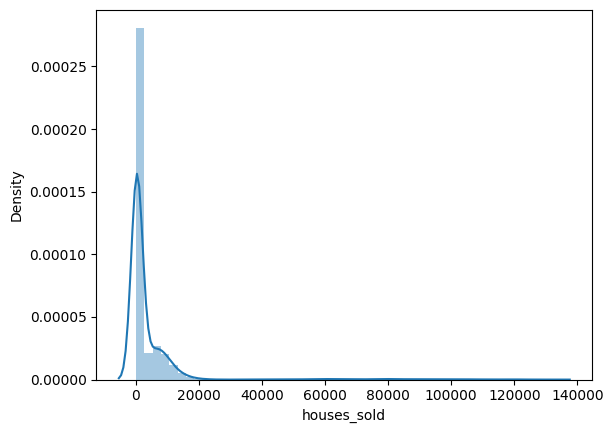

In [319]:
sns.distplot(area_df['houses_sold'])

<Axes: xlabel='houses_sold'>

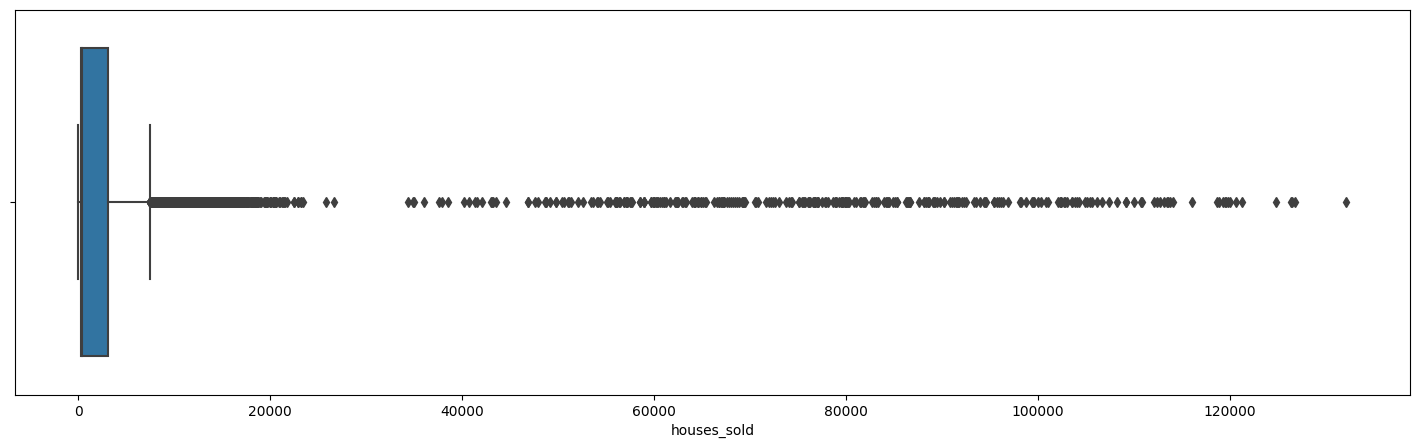

In [320]:
plt.figure(figsize=(18,5))
sns.boxplot(x=area_df['houses_sold'])

In [321]:
q3=area_df['houses_sold'].quantile(0.75)
q1=area_df['houses_sold'].quantile(0.25)
iqr=q3-q1

In [322]:
upperlim= q3 + (1.5*iqr)
lowerlim= q1 - (1.5*iqr)
print(upperlim, lowerlim)

7494.5 -4101.5


In [323]:
area_df[area_df['houses_sold']<=lowerlim].shape

(0, 7)

In [324]:
area_df['houses_sold'].min()

2.0

<Axes: xlabel='no_of_crimes'>

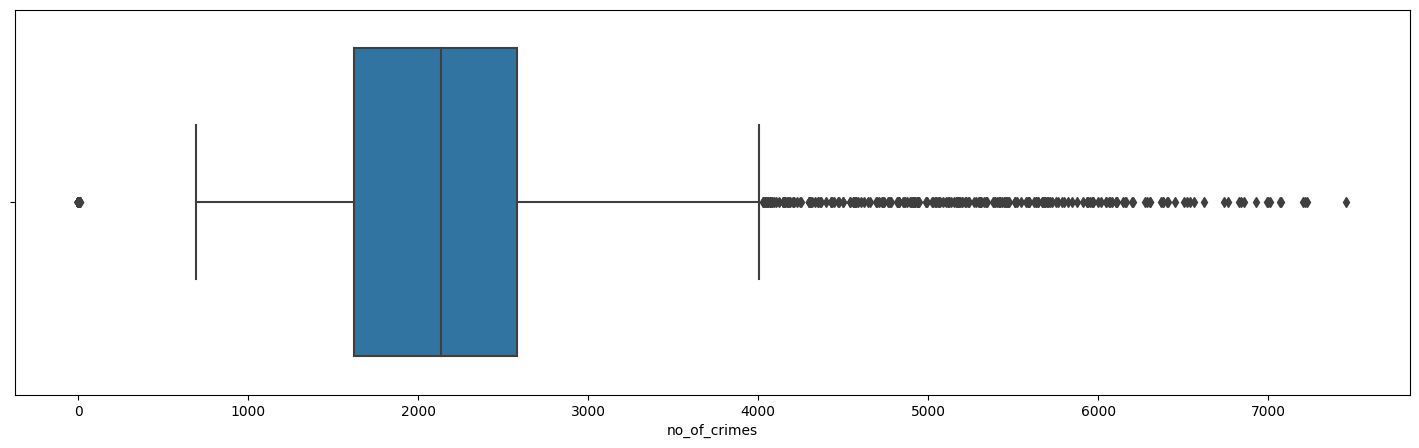

In [325]:
plt.figure(figsize=(18,5))
sns.boxplot(x=area_df['no_of_crimes'])

In [326]:
q3=area_df['no_of_crimes'].quantile(0.75)
q1=area_df['no_of_crimes'].quantile(0.25)
iqr=q3-q1

In [327]:
upperlim= q3 + (1.5*iqr)
lowerlim= q1 - (1.5*iqr)
print(upperlim, lowerlim)

4020.5 184.5


In [328]:
area_df['no_of_crimes'].min()

0.0

In [329]:
area_df[(area_df['no_of_crimes']>=upperlim)|(area_df['no_of_crimes']<=lowerlim)].shape

(354, 7)

Since for Both the features "Houses Sold" and "no_of_crimes" there is huge amount of Data in Outlier range. So removing them here will not be a good decision. And specially the Outlier Values can help in determing the Date on which Houses were sold most and most no of crimes happened in that area. 
So we will be keeping the Outliers

## NULL Values

In [330]:
def info_func():
    y=pd.DataFrame(index=area_df.columns)
    y['Datatype']=area_df.dtypes
    y['Not null']=area_df.count()
    y['Null']=area_df.isnull().sum()
    y['Unique']=area_df.nunique()
    return y

In [331]:
info_func()

Datatype  Not null  Null  Unique
date           datetime64[ns]     13549     0     301
area                   object     13549     0      45
average_price           int64     13549     0   13343
code                   object     13549     0      45
houses_sold           float64     13455    94    3946
no_of_crimes          float64      7439  6110    2669
borough_flag            int64     13549     0       2

## Let's first work with 'houses_sold' NULL Values.

In [332]:
area_df1= area_df[area_df['houses_sold'].isnull()]
area_df1

date             area  average_price       code  houses_sold  \
606   1996-02-01          enfield          71070  E09000030          NaN   
625   1996-02-01    tower hamlets          71070  E09000010          NaN   
1760  1998-04-01       south east          83176  E09000012          NaN   
1799  1998-04-01          hackney          83176  E12000008          NaN   
13459 2019-12-01  east of england         293497  E12000006          NaN   
...          ...              ...            ...        ...          ...   
13544 2020-01-01         haringey         578728  E09000014          NaN   
13545 2020-01-01       south east         320700  E12000008          NaN   
13546 2020-01-01   waltham forest         452299  E09000031          NaN   
13547 2020-01-01          lambeth         526690  E09000022          NaN   
13548 2020-01-01          england         247355  E92000001          NaN   

       no_of_crimes  borough_flag  
606             NaN             1  
625             NaN             1  
1760            NaN             0  
1799            NaN             1  
13459           NaN             0  
...             ...           ...  
13544        2453.0             1  
13545           NaN             0  
13546        2074.0             1  
13547        2913.0             1  
13548           NaN             0  

[94 rows x 7 columns]

In [333]:
area_df1['date'].value_counts()

date
2019-12-01    45
2020-01-01    45
1996-02-01     2
1998-04-01     2
Name: count, dtype: int64

In [334]:
area_df['date'].isin(['2019-12-01','2020-01-01']).value_counts()

date
False    13459
True        90
Name: count, dtype: int64

As we can see, there are 2 NULL Values from 1998-04-01 and 1996-02-01 Data. We can delete those records since it is not going to disturb our those
months data.

In [335]:
area_df.shape

(13549, 7)

In [336]:
area_df=area_df.loc[~(area_df['houses_sold'].isnull() & area_df['date'].isin(['1998-04-01','1996-02-01']))]

In [337]:
area_df.shape

(13545, 7)

Now if I think for remaining Null Values which is for specific months '2019-12-01' and '2020-01-01' for different areas, they can't be change with the other months values or Mean or Median values for a year or for a area. So Droppping these 2 months records seems to be better for me to avoid errors in
Data Analysis further.

In [338]:
area_df[area_df['houses_sold'].isnull()][['date']].value_counts()

date      
2019-12-01    45
2020-01-01    45
Name: count, dtype: int64

In [339]:
area_df=area_df[area_df['houses_sold'].notna()]

In [340]:
area_df[area_df['houses_sold'].isnull()]

Empty DataFrame
Columns: [date, area, average_price, code, houses_sold, no_of_crimes, borough_flag]
Index: []

In [341]:
area_df.shape

(13455, 7)

In [342]:
info_func()

Datatype  Not null  Null  Unique
date           datetime64[ns]     13455     0     299
area                   object     13455     0      45
average_price           int64     13455     0   13253
code                   object     13455     0      45
houses_sold           float64     13455     0    3946
no_of_crimes          float64      7375  6080    2658
borough_flag            int64     13455     0       2

### No_of_crimes NULL Values

In [343]:
area_df.shape

(13455, 7)

For the null values I will be changing the values with either Median of given data.


* From the distplot visualizations as we saw above in outliers, it is clear that no_of_crimes are right skewed.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
* Hence we will impute the NaN values in the no_of_crimes column with its median date wise yearly.

In [344]:
area_df['year']= area_df['date'].dt.year
area_df.head()

date            area  average_price       code  houses_sold  \
0 1995-01-01  city of london          91449  E09000001         17.0   
1 1995-01-01       greenwich          62300  E09000011        182.0   
2 1995-01-01      north east          42076  E12000001       1983.0   
3 1995-01-01         enfield          72515  E09000010        327.0   
4 1995-01-01      north west          43958  E12000002       5801.0   

   no_of_crimes  borough_flag  year  
0           NaN             1  1995  
1           NaN             1  1995  
2           NaN             0  1995  
3           NaN             1  1995  
4           NaN             0  1995

In [345]:
list_b= (area_df['year'].unique())

In [346]:
def date_med(x):
    for i in x:
        y=area_df[area_df['year'].isin([i])]['no_of_crimes'].median(axis=0, skipna= True)
        area_df.loc[area_df['year'].isin([i]) & area_df['no_of_crimes'].isnull() ,['no_of_crimes']] = y

In [347]:
date_med(list_b)

In [348]:
info_func()

Datatype  Not null  Null  Unique
date           datetime64[ns]     13455     0     299
area                   object     13455     0      45
average_price           int64     13455     0   13253
code                   object     13455     0      45
houses_sold           float64     13455     0    3946
no_of_crimes          float64     10215  3240    2667
borough_flag            int64     13455     0       2
year                    int32     13455     0      25

In [349]:
area_df

date                    area  average_price       code  \
0     1995-01-01          city of london          91449  E09000001   
1     1995-01-01               greenwich          62300  E09000011   
2     1995-01-01              north east          42076  E12000001   
3     1995-01-01                 enfield          72515  E09000010   
4     1995-01-01              north west          43958  E12000002   
...          ...                     ...            ...        ...   
13454 2019-11-01             westminster         955615  E09000033   
13455 2019-11-01                 bromley         438792  E09000006   
13456 2019-11-01                  newham         365400  E09000025   
13457 2019-11-01  kensington and chelsea        1193336  E09000020   
13458 2019-11-01              hillingdon         408048  E09000017   

       houses_sold  no_of_crimes  borough_flag  year  
0             17.0           NaN             1  1995  
1            182.0           NaN             1  1995  
2           1983.0           NaN             0  1995  
3            327.0           NaN             1  1995  
4           5801.0           NaN             0  1995  
...            ...           ...           ...   ...  
13454        150.0        6843.0             1  2019  
13455        374.0        2282.0             1  2019  
13456        142.0        3063.0             1  2019  
13457        113.0        2240.0             1  2019  
13458        216.0        2441.0             1  2019  

[13455 rows x 8 columns]

<!-- Ok So, we can see the no_of_crimes for area='city of london' is Mostly 0 over the period in every month. We can fill null values of no_of_crimes
for city of london as 0. -->

Now changing the Remaining Null Values Date wise, either Monthly Wise or Area Wise is not going to remove all the Null Values of this dataset.
So, I will be finally dropping this column. This is not of much use.



In [350]:
# area_df.loc[area_df['area'].isin(['city of london']) & area_df['no_of_crimes'].isnull() ,['no_of_crimes']] = 0.0

In [351]:
area_df.drop(['no_of_crimes'],axis=1, inplace=True)

In [352]:
info_func()

Datatype  Not null  Null  Unique
date           datetime64[ns]     13455     0     299
area                   object     13455     0      45
average_price           int64     13455     0   13253
code                   object     13455     0      45
houses_sold           float64     13455     0    3946
borough_flag            int64     13455     0       2
year                    int32     13455     0      25

## DUPLICATE VALUES

In [353]:
info_func()

Datatype  Not null  Null  Unique
date           datetime64[ns]     13455     0     299
area                   object     13455     0      45
average_price           int64     13455     0   13253
code                   object     13455     0      45
houses_sold           float64     13455     0    3946
borough_flag            int64     13455     0       2
year                    int32     13455     0      25

Since, there are features like **area, date , code and borough_fla**g which can have duplicate values. \
Similarly **average_price, houses_sold, no_of_crimes** can be same too for multiple records.

In [55]:
area_df.head()

date            area  average_price       code  houses_sold  \
0 1995-01-01  city of london          91449  E09000001         17.0   
1 1995-01-01       greenwich          62300  E09000011        182.0   
2 1995-01-01      north east          42076  E12000001       1983.0   
3 1995-01-01         enfield          72515  E09000010        327.0   
4 1995-01-01      north west          43958  E12000002       5801.0   

   borough_flag  year  
0             1  1995  
1             1  1995  
2             0  1995  
3             1  1995  
4             0  1995

In [56]:
area_df[['date','area','code']].value_counts()

date        area                  code     
1995-01-01  barking and dagenham  E09000002    1
2011-08-01  outer london          E13000002    1
            ealing                E09000009    1
            east midlands         E12000004    1
            east of england       E12000006    1
                                              ..
2003-04-01  redbridge             E09000026    1
            richmond upon thames  E09000027    1
            south east            E12000008    1
            south west            E12000009    1
2019-11-01  yorks and the humber  E12000003    1
Name: count, Length: 13455, dtype: int64

In [57]:
d= pd.DataFrame(area_df[['date','area','code']].value_counts())
d=d.reset_index()

In [58]:
d['count'].value_counts()

count
1    13455
Name: count, dtype: int64

#### No Duplicate Values. Hence let's move to our 2nd DataFrame.

# year_df

In [59]:
year_df.head()

code                  area        date  median_salary  \
0  E09000001        city of london  1999-12-01        33020.0   
1  E09000002  barking and dagenham  1999-12-01        21480.0   
2  E09000003                barnet  1999-12-01        19568.0   
3  E09000004                bexley  1999-12-01        18621.0   
4  E09000005                 brent  1999-12-01        18532.0   

   life_satisfaction mean_salary recycling_pct  population_size  \
0                NaN       48922             0           6581.0   
1                NaN       23620             3         162444.0   
2                NaN       23128             8         313469.0   
3                NaN       21386            18         217458.0   
4                NaN       20911             6         260317.0   

   number_of_jobs  area_size  no_of_houses  borough_flag  
0             NaN        NaN           NaN             1  
1             NaN        NaN           NaN             1  
2             NaN        NaN           NaN             1  
3             NaN        NaN           NaN             1  
4             NaN        NaN           NaN             1

In [60]:
year_df.shape

(1071, 12)

## Checking Data Type/Manipulating Data

### Date

In [61]:
year_df['date']= pd.to_datetime(year_df['date'])

In [62]:
year_df['year']= year_df['date'].dt.year

In [63]:
def info_func1():
    temp1 = pd.DataFrame(index=year_df.columns)
    temp1['Not Null']= year_df.count()
    temp1['Null']= year_df.isnull().sum()
    temp1['Unique']= year_df.nunique()
    temp1['Data Type']=year_df.dtypes
    return temp1

In [64]:
info_func1()

Not Null  Null  Unique       Data Type
code                   1071     0      51          object
area                   1071     0      51          object
date                   1071     0      21  datetime64[ns]
median_salary          1049    22    1017         float64
life_satisfaction       352   719      82         float64
mean_salary            1071     0    1041          object
recycling_pct           860   211      57          object
population_size        1018    53    1017         float64
number_of_jobs          931   140     504         float64
area_size               666   405      37         float64
no_of_houses            666   405     663         float64
borough_flag           1071     0       2           int64
year                   1071     0      21           int32

### recycling_pct

In [65]:
def to_float(x):
    return float(x)

In [66]:
year_df= year_df.drop(year_df[year_df['recycling_pct']=='na'].index)

In [67]:
year_df['recycling_pct']= year_df['recycling_pct'].apply(lambda x: to_float(x))

### mean_salary

In [68]:
year_df['mean_salary'].value_counts()

mean_salary
-        10
#         7
34214     2
33442     2
34199     2
         ..
42838     1
29726     1
30342     1
28459     1
31251     1
Name: count, Length: 1040, dtype: int64

In [69]:
year_df[~(year_df['mean_salary']== '#') & ~(year_df['mean_salary']=='-')].shape

(1053, 13)

Since most of the Column Values have NULL Value where mean salary is # or - , we can drop these rows/records.

In [70]:
year_df= year_df[~(year_df['mean_salary']== '#') & ~(year_df['mean_salary']=='-')]

In [71]:
year_df['mean_salary']= year_df['mean_salary'].apply(lambda x: to_float(x))

In [72]:
info_func1()

Not Null  Null  Unique       Data Type
code                   1053     0      51          object
area                   1053     0      51          object
date                   1053     0      21  datetime64[ns]
median_salary          1041    12    1009         float64
life_satisfaction       350   703      81         float64
mean_salary            1053     0    1038         float64
recycling_pct           853   200      56         float64
population_size        1001    52    1000         float64
number_of_jobs          925   128     504         float64
area_size               656   397      37         float64
no_of_houses            656   397     653         float64
borough_flag           1053     0       2           int64
year                   1053     0      21           int32

# NULL Values/Outliers

In [73]:
year_df[year_df['median_salary'].isnull()]

code                    area       date  median_salary  \
257   E09000003                  barnet 2004-12-01            NaN   
279   E09000025                  newham 2004-12-01            NaN   
280   E09000026               redbridge 2004-12-01            NaN   
471   E09000013  hammersmith and fulham 2008-12-01            NaN   
744   E09000031          waltham forest 2013-12-01            NaN   
870   E09000004                  bexley 2016-12-01            NaN   
972   E09000004                  bexley 2018-12-01            NaN   
989   E09000021    kingston upon thames 2018-12-01            NaN   
994   E09000026               redbridge 2018-12-01            NaN   
1025  E09000006                 bromley 2019-12-01            NaN   
1062  E13000001            inner london 2019-12-01            NaN   
1063  E13000002            outer london 2019-12-01            NaN   

      life_satisfaction  mean_salary  recycling_pct  population_size  \
257                 NaN      30795.0           20.0         323723.0   
279                 NaN      29224.0            6.0         254434.0   
280                 NaN      27206.0           16.0         248774.0   
471                 NaN      46620.0           28.0         177088.0   
744                7.34      31143.0           33.0         265797.0   
870                7.46      32666.0           53.0         244760.0   
972                7.54      34496.0           54.0         247258.0   
989                7.78      36282.0           49.0         175470.0   
994                7.54      31990.0           25.0         303858.0   
1025                NaN      37564.0            NaN              NaN   
1062                NaN      59987.0            NaN              NaN   
1063                NaN      38614.0            NaN              NaN   

      number_of_jobs  area_size  no_of_houses  borough_flag  year  
257         135000.0     8675.0      132856.0             1  2004  
279          81000.0     3857.0       96805.0             1  2004  
280          85000.0     5644.0       96196.0             1  2004  
471         135000.0     1715.0       80510.0             1  2008  
744          81000.0     3881.0       99251.0             1  2013  
870          86000.0     6429.0       96864.0             1  2016  
972          87000.0     6429.0       97905.0             1  2018  
989          96000.0     3726.0       67141.0             1  2018  
994          92000.0     5644.0      103924.0             1  2018  
1025             NaN        NaN           NaN             1  2019  
1062             NaN        NaN           NaN             0  2019  
1063             NaN        NaN           NaN             0  2019

There are just 12 rows missing for Median_Salary Column and are for different years different areas. We can delete them

In [74]:
# year_df[year_df['median_salary'].notna()]

In [75]:
year_df= year_df[year_df['median_salary'].notna()]

In [76]:
info_func1()

Not Null  Null  Unique       Data Type
code                   1041     0      51          object
area                   1041     0      51          object
date                   1041     0      21  datetime64[ns]
median_salary          1041     0    1009         float64
life_satisfaction       345   696      81         float64
mean_salary            1041     0    1026         float64
recycling_pct           844   197      56         float64
population_size         992    49     991         float64
number_of_jobs          916   125     504         float64
area_size               647   394      37         float64
no_of_houses            647   394     645         float64
borough_flag           1041     0       2           int64
year                   1041     0      21           int32

In [275]:
# year_df[year_df['population_size'].isnull()]

In [78]:
year_df[year_df['population_size'].isnull()]['year'].value_counts()

year
2019    47
2017     1
2018     1
Name: count, dtype: int64

In [79]:
year_df.shape

(1041, 13)

In [80]:
year_df[(year_df['population_size'].notna()) | ~(year_df['year']==2019)].shape

(994, 13)

In [81]:
year_df[year_df['year']==2019].shape

(47, 13)

For Population Size, since most of the data is of 2019 year. And if we see other column values for 2019, they are also missing for most
of the columns. So I will we removing the 2019 records. 2019 data will not be much helpful for data analysis.

In [82]:
year_df=year_df[~(year_df['year']==2019)]

In [83]:
year_df.shape

(994, 13)

<Axes: xlabel='population_size'>

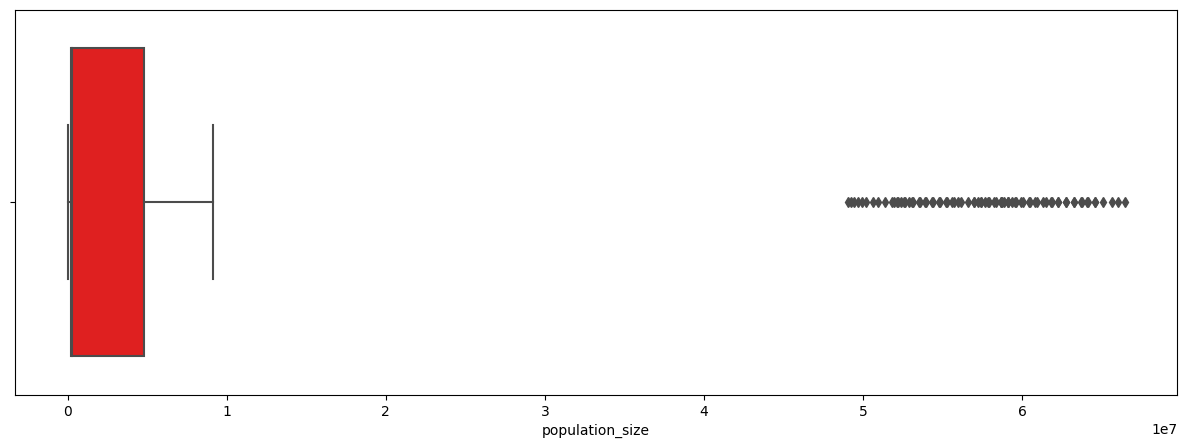

In [84]:
plt.figure(figsize=(15,5))
sns.boxplot(x=year_df['population_size'],color='red')

In [85]:
m1=year_df[year_df['year']==2018]['population_size'].median()
m2=year_df[year_df['year']==2017]['population_size'].median()

In [86]:
year_df.loc[year_df['year'].isin([2018]) & year_df['population_size'].isnull() ,['population_size']] = m1
year_df.loc[year_df['year'].isin([2017]) & year_df['population_size'].isnull() ,['population_size']] = m2

In [87]:
year_df[year_df['population_size'].isnull()]

Empty DataFrame
Columns: [code, area, date, median_salary, life_satisfaction, mean_salary, recycling_pct, population_size, number_of_jobs, area_size, no_of_houses, borough_flag, year]
Index: []

In [88]:
info_func1()

Not Null  Null  Unique       Data Type
code                    994     0      51          object
area                    994     0      51          object
date                    994     0      20  datetime64[ns]
median_salary           994     0     964         float64
life_satisfaction       345   649      81         float64
mean_salary             994     0     980         float64
recycling_pct           844   150      56         float64
population_size         994     0     993         float64
number_of_jobs          916    78     504         float64
area_size               647   347      37         float64
no_of_houses            647   347     645         float64
borough_flag            994     0       2           int64
year                    994     0      20           int32

### Number of Jobs

For this column, I will be changing the Null/Missing Values with the Median of Column Values.


In [89]:
year_df[year_df['number_of_jobs'].isnull()]['year'].value_counts()

year
1999    48
2004     2
2005     2
2006     2
2007     2
2008     2
2009     2
2010     2
2011     2
2012     2
2013     2
2014     2
2015     2
2016     2
2017     2
2018     2
Name: count, dtype: int64

<Axes: xlabel='number_of_jobs'>

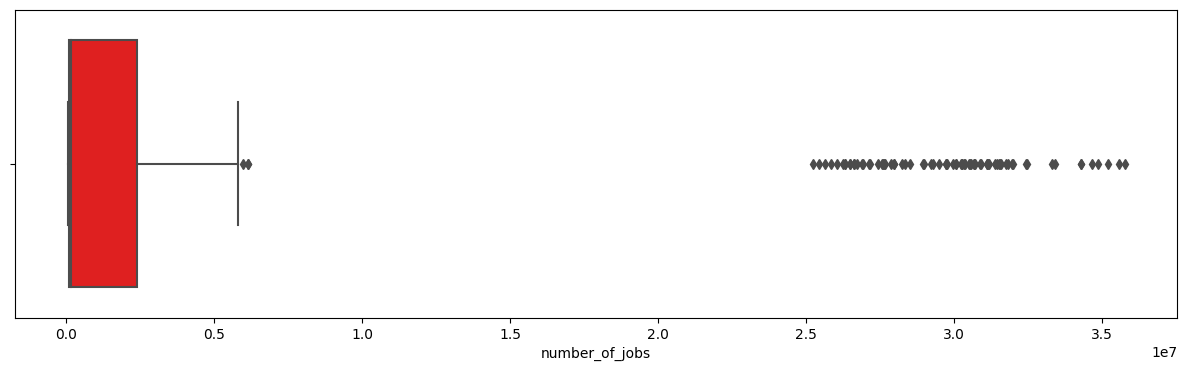

In [90]:
plt.figure(figsize=(15,4))
sns.boxplot(x=year_df['number_of_jobs'],color='red')

In [91]:
q3=year_df['number_of_jobs'].quantile(0.75)
q1=year_df['number_of_jobs'].quantile(0.25)
iqr=q3-q1

In [92]:
upperlim= q3 + (1.5*iqr)
lowerlim= q1 - (1.5*iqr)
print(upperlim, lowerlim)

5826250.0 -3343750.0


In [93]:
year_df[year_df['number_of_jobs']<=lowerlim]

Empty DataFrame
Columns: [code, area, date, median_salary, life_satisfaction, mean_salary, recycling_pct, population_size, number_of_jobs, area_size, no_of_houses, borough_flag, year]
Index: []

In [94]:
year_df['number_of_jobs'].min()

47000.0

Since there are Outlier Values, Changing the Missing Values of No of Jobs column with Median number_of_jobs.

In [95]:
def median(x):
    x.fillna(x.median(), inplace=True)

In [96]:
median(year_df['number_of_jobs'])

In [97]:
year_df[year_df['number_of_jobs'].isnull()]

Empty DataFrame
Columns: [code, area, date, median_salary, life_satisfaction, mean_salary, recycling_pct, population_size, number_of_jobs, area_size, no_of_houses, borough_flag, year]
Index: []

In [98]:
info_func1()

Not Null  Null  Unique       Data Type
code                    994     0      51          object
area                    994     0      51          object
date                    994     0      20  datetime64[ns]
median_salary           994     0     964         float64
life_satisfaction       345   649      81         float64
mean_salary             994     0     980         float64
recycling_pct           844   150      56         float64
population_size         994     0     993         float64
number_of_jobs          994     0     504         float64
area_size               647   347      37         float64
no_of_houses            647   347     645         float64
borough_flag            994     0       2           int64
year                    994     0      20           int32

### Life Satisfication

In [274]:
# year_df[year_df['life_satisfaction'].isnull()]['year'].value_counts()

In [100]:
info_func1()

Not Null  Null  Unique       Data Type
code                    994     0      51          object
area                    994     0      51          object
date                    994     0      20  datetime64[ns]
median_salary           994     0     964         float64
life_satisfaction       345   649      81         float64
mean_salary             994     0     980         float64
recycling_pct           844   150      56         float64
population_size         994     0     993         float64
number_of_jobs          994     0     504         float64
area_size               647   347      37         float64
no_of_houses            647   347     645         float64
borough_flag            994     0       2           int64
year                    994     0      20           int32

In [101]:
(649*100)/994

65.29175050301811

Since, for Life Satisfication Column there are a lot values Missing. 65 % of Data is Missing in the Entire Column. So No Benefit in 
changing the data with Mean, Median or Most Frequent Values of Column. I will be removing entire column.

In [102]:
year_df.drop(['life_satisfaction'],axis=1, inplace=True)

In [273]:
# info_func1()

### recycling_pct

In [271]:
# year_df[year_df['recycling_pct'].isnull()].head()

In [272]:
# year_df[year_df['recycling_pct'].isnull()]['year'].value_counts()

<Axes: xlabel='recycling_pct'>

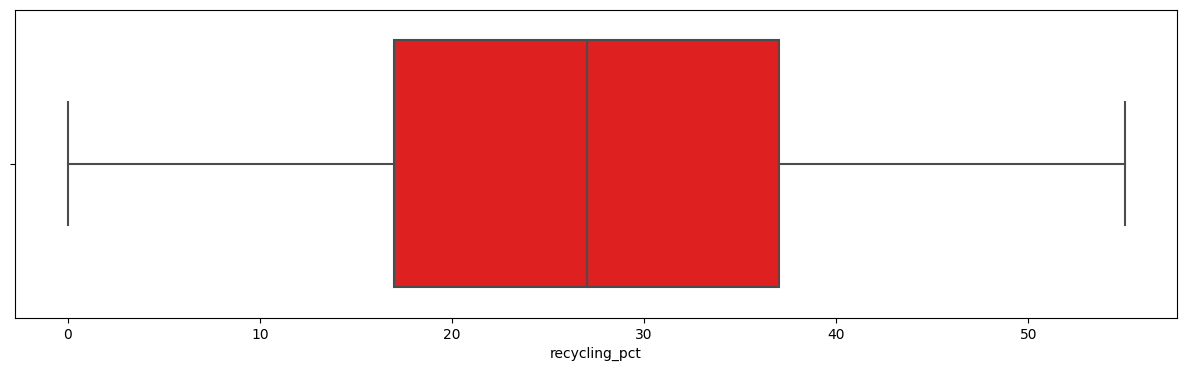

In [106]:
plt.figure(figsize=(15,4))
sns.boxplot(x=year_df['recycling_pct'],color='red')

In [107]:
q3=year_df['recycling_pct'].quantile(0.75)
q1=year_df['recycling_pct'].quantile(0.25)
iqr=q3-q1

In [108]:
upperlim= q3 + (1.5*iqr)
lowerlim= q1 - (1.5*iqr)
print(upperlim, lowerlim)

67.0 -13.0


In [109]:
year_df[(year_df['recycling_pct']>=upperlim) | (year_df['recycling_pct']<=lowerlim)]

Empty DataFrame
Columns: [code, area, date, median_salary, mean_salary, recycling_pct, population_size, number_of_jobs, area_size, no_of_houses, borough_flag, year]
Index: []

In [110]:
year_df['recycling_pct'].min()

0.0

Since, there are no outliers in the 'recycling_pct' column. So, I will be changing the Null/Missing Values with the Mean of Column Values.

In [111]:
year_df['recycling_pct'].fillna(year_df['recycling_pct'].mean(), inplace=True)

In [112]:
info_func1()

Not Null  Null  Unique       Data Type
code                  994     0      51          object
area                  994     0      51          object
date                  994     0      20  datetime64[ns]
median_salary         994     0     964         float64
mean_salary           994     0     980         float64
recycling_pct         994     0      57         float64
population_size       994     0     993         float64
number_of_jobs        994     0     504         float64
area_size             647   347      37         float64
no_of_houses          647   347     645         float64
borough_flag          994     0       2           int64
year                  994     0      20           int32

### area_size	

In [113]:
year_df[year_df['area_size'].isnull()]['year'].value_counts()

year
1999    48
2000    47
2017    14
2016    14
2015    14
2014    14
2013    14
2012    14
2011    14
2010    14
2009    14
2008    14
2007    14
2006    14
2005    14
2004    14
2003    14
2002    14
2001    14
2018    14
Name: count, dtype: int64

In [276]:
# year_df[year_df['area_size'].isnull()]

<Axes: xlabel='area_size'>

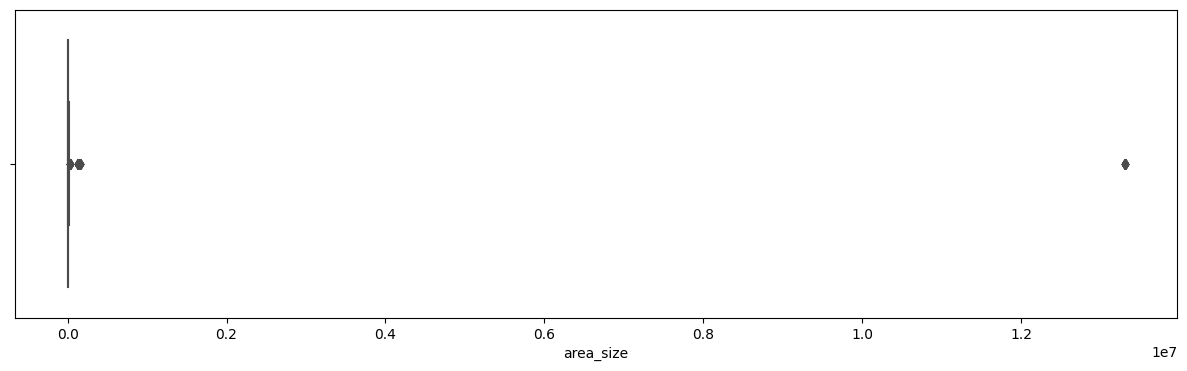

In [115]:
plt.figure(figsize=(15,4))
sns.boxplot(x=year_df['area_size'],color='red')

In [116]:
q3=year_df['area_size'].quantile(0.75)
q1=year_df['area_size'].quantile(0.25)
iqr=q3-q1

In [117]:
upperlim= q3 + (1.5*iqr)
lowerlim= q1 - (1.5*iqr)
print(upperlim, lowerlim)

16110.0 -4930.0


In [118]:
year_df['area_size'].min()

315.0

In [119]:
year_df[(year_df['area_size']<lowerlim)]

Empty DataFrame
Columns: [code, area, date, median_salary, mean_salary, recycling_pct, population_size, number_of_jobs, area_size, no_of_houses, borough_flag, year]
Index: []

Since there are Outlier Values above Upper Limit of Interquantile range, I will be replacing Null/Missing Values with Median of Column Values

In [120]:
median(year_df['area_size'])

In [121]:
info_func1()

Not Null  Null  Unique       Data Type
code                  994     0      51          object
area                  994     0      51          object
date                  994     0      20  datetime64[ns]
median_salary         994     0     964         float64
mean_salary           994     0     980         float64
recycling_pct         994     0      57         float64
population_size       994     0     993         float64
number_of_jobs        994     0     504         float64
area_size             994     0      37         float64
no_of_houses          647   347     645         float64
borough_flag          994     0       2           int64
year                  994     0      20           int32

### no_of_houses

In [122]:
year_df[year_df['no_of_houses'].isnull()]['year'].value_counts()

year
1999    48
2000    47
2017    14
2016    14
2015    14
2014    14
2013    14
2012    14
2011    14
2010    14
2009    14
2008    14
2007    14
2006    14
2005    14
2004    14
2003    14
2002    14
2001    14
2018    14
Name: count, dtype: int64

<Axes: xlabel='no_of_houses'>

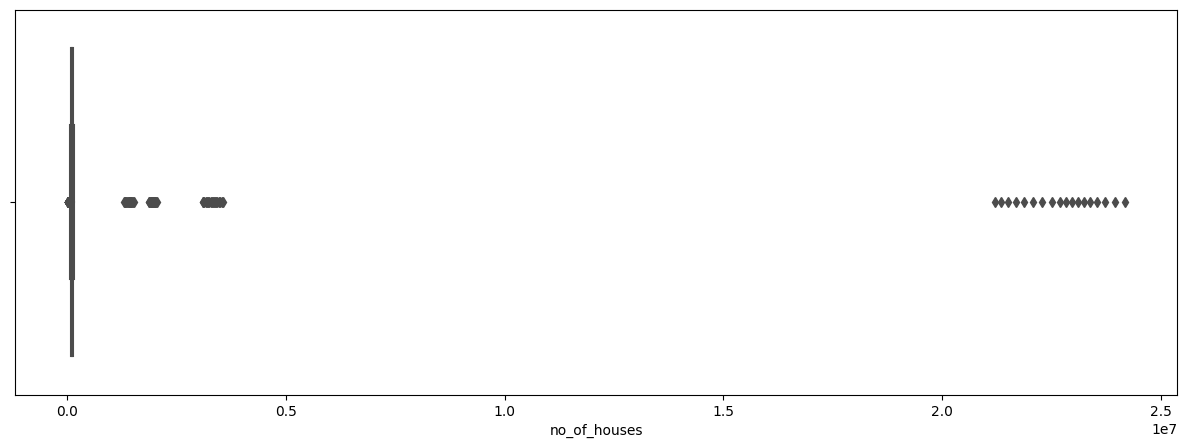

In [123]:
plt.figure(figsize=(15,5))
sns.boxplot(x=year_df['no_of_houses'],color='red')

In [124]:
year_df['no_of_houses'].min()

5009.0

Since there are Outlier Values in the column, I will be replacing Null/Missing Values with Median of Column Values.

In [125]:
median(year_df['no_of_houses'])

In [126]:
info_func1()

Not Null  Null  Unique       Data Type
code                  994     0      51          object
area                  994     0      51          object
date                  994     0      20  datetime64[ns]
median_salary         994     0     964         float64
mean_salary           994     0     980         float64
recycling_pct         994     0      57         float64
population_size       994     0     993         float64
number_of_jobs        994     0     504         float64
area_size             994     0      37         float64
no_of_houses          994     0     645         float64
borough_flag          994     0       2           int64
year                  994     0      20           int32

## Duplicate Values

In [127]:
year_df[['date','area','code']].value_counts()

date        area                      code     
1999-12-01  barking and dagenham      E09000002    1
2012-12-01  inner london              E13000001    1
            east midlands             E12000004    1
            enfield                   E09000010    1
            england                   E92000001    1
                                                  ..
2005-12-01  wandsworth                E09000032    1
            west midlands             E12000005    1
            westminster               E09000033    1
            yorkshire and the humber  E12000003    1
2018-12-01  yorkshire and the humber  E12000003    1
Name: count, Length: 994, dtype: int64

In [128]:
dd= pd.DataFrame(year_df[['year','area','code']].value_counts())

In [129]:
dd= dd.reset_index()
dd['count'].value_counts()

count
1    994
Name: count, dtype: int64

### There are No Duplicate Values When Date, Area & Area Code are same for more than one row. Hence let's move to EDA.

# EDA

# Problem Statement

1. Corelation b/w column values. (HeatMap)
2. What is the effect of average price of houses to the no of houses sold in a area??
3. Under which Category Most Areas Falls , Borough or Non-Borough Flag Areas??
4. How is the avg price of houses and Which areas have shown a drastic difference in their avg prices of Houses over the years for each area??
5. How is the Houses Sold Count and Which areas have shown a drastic difference in houses Sold count over the years for each area??
6. What is the effect on avg_price of houses & houses_sold in areas coming from or coming not from borough flag of London??
7. what is the Most and Least Expensive year in terms of avg_price of houses? ?
8. Which year led to most and least Sold Houses and Why??

## 1. Corelation b/w column values. (HeatMap)
## 2. What is the effect of average price of houses to the no of houses sold in a area??

In [130]:
area_df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'borough_flag',
       'year'],
      dtype='object')

In [131]:
area_df1= area_df[['date','average_price','houses_sold', 'year']]

In [132]:
area_df1.corr()

date  average_price  houses_sold      year
date           1.000000       0.664115    -0.033801  0.999204
average_price  0.664115       1.000000    -0.168256  0.663477
houses_sold   -0.033801      -0.168256     1.000000 -0.034938
year           0.999204       0.663477    -0.034938  1.000000

<Axes: >

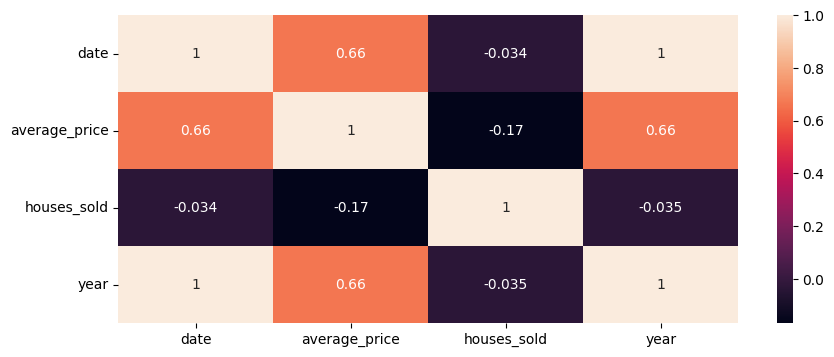

In [133]:
plt.figure(figsize=(10,4))
sns.heatmap(area_df1.corr(), annot=True)

With the Increasing Date/Year, 
- the average Price of Houses have increased in London for all areas.
- The number of Houses Sold have decreased.

The Average Price and Houses Sold have also a quite -ive relation with each other.


In [241]:
data = area_df['borough_flag'].value_counts()
data

borough_flag
1    9867
0    3588
Name: count, dtype: int64

## 3. Under which Category Most Areas Falls , Borough or Non-Borough Flag Areas??

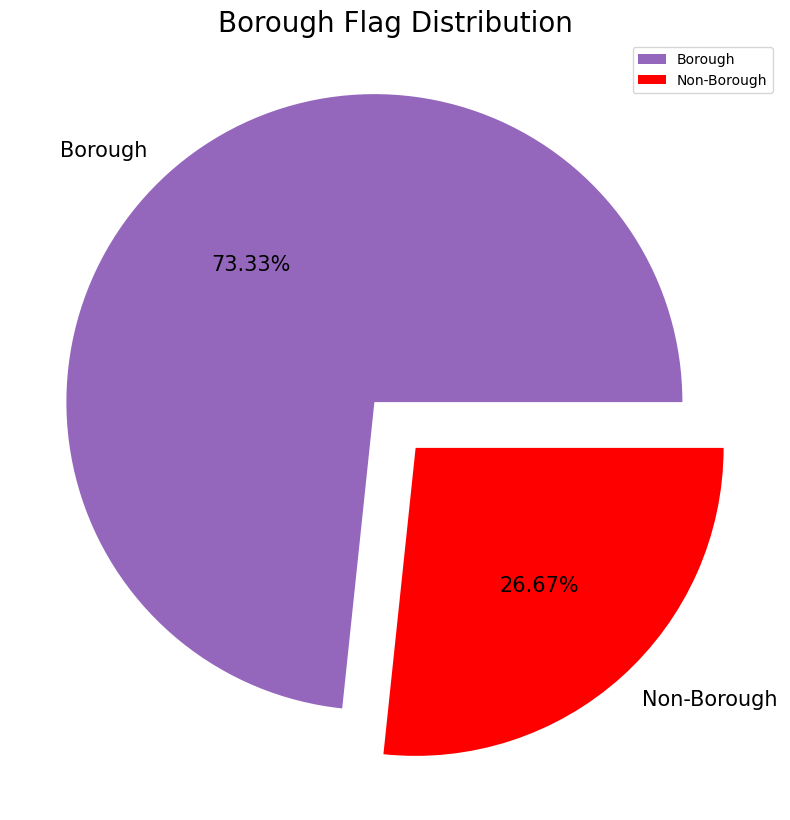

In [245]:
data = area_df['borough_flag'].value_counts()
labels = ['Borough','Non-Borough']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0.1,0.1)
colors = ['C4', 'r']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Borough Flag Distribution',size=20,loc='center')
plt.legend()

So Most of the Data Set Data contains Borough Flag Areas Data.  \
**One Important Finding for the Outlier Values or Skewness of the Dataset is Unevenly distribution of Borough and Non-Borough Flag Areas in our DataSet**

## 4. What is the avg price of houses and Which areas have shown a drastic difference in their avg prices of Houses over the years for each area??


In [198]:
area_df['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [212]:
def range(x):
    if x<=1998:
        return '1995-1998'
    elif x>1998 and x<=2002:
        return '1999-2002'
    elif x>2002 and x<=2006:
        return '2003-2006'
    elif x>2006 and x<=2010:
        return '2007-2010'
    elif x>2010 and x<=2014:
        return '2011-2014'
    elif x>2014 and x<=2019:
        return '2015-2019'

area_df['year_ran']= area_df['year'].apply(lambda x: range(x))


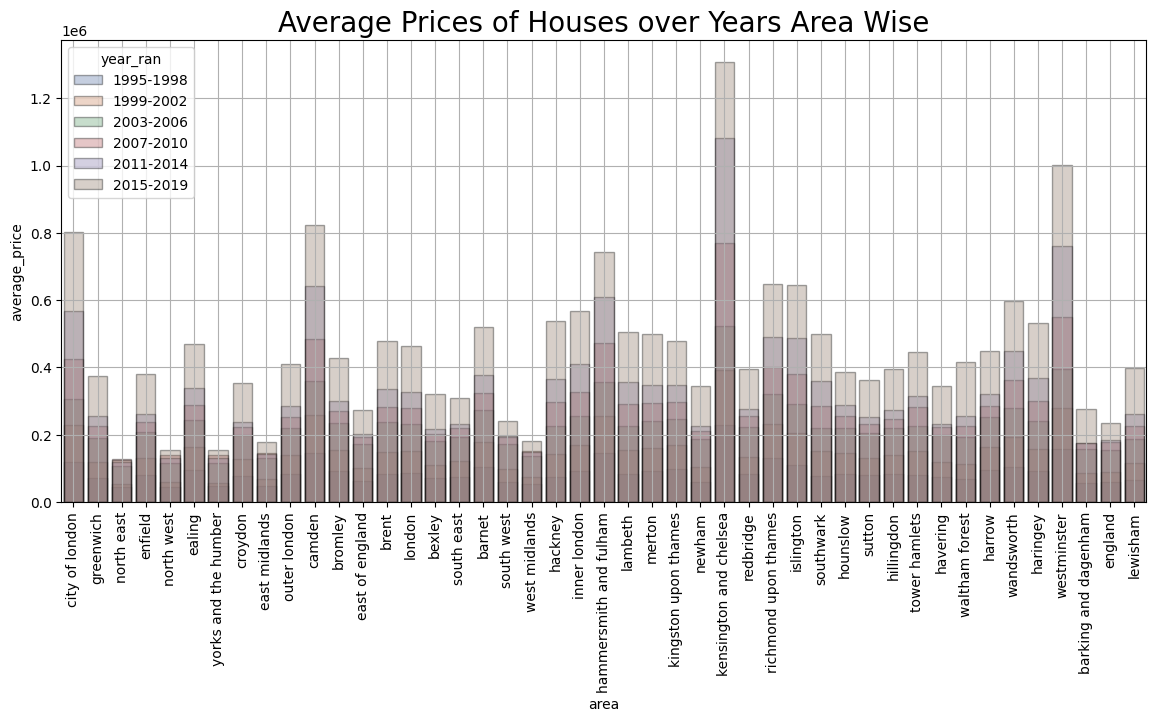

In [223]:
plt.figure(figsize=(14, 6))
sns.barplot(x='area', y='average_price', data=area_df, palette='deep', hue='year_ran', dodge=False, alpha=0.35, ci=None, edgecolor='black')
plt.xticks(rotation=90)
plt.title('Average Prices of Houses over Years Area Wise',size=20)
plt.grid()

Here, we can see all the areas Average Price of Houses have increased only over the timeframe of 1996-2020. 
With Increasing years the average price of houses have increased. We will see to other more factors that led to Increase in Avg Prices of Houses in London Areas.

* The Average Price of Houses is highest in Kesington and chelsea which is a Borough Flag Area. followed by
- westminster
- camden
- city of london
- hammersmith and fulham
These all are Non-Borough Flag Area.
  
* The Average Price of Houses is lowest in North East and North West followed by
- east midlands
- west midlands
- yorks and the humber
- england
These all are Non-Borough Flag Area.

In [282]:
# area_df.sort_values('average_price', ascending=False)[300:360]

In [137]:
area_l=['city of london','camden','kensington and chelsea','richmond upon thames','westminster','hammersmith and fulham','wandsworth']

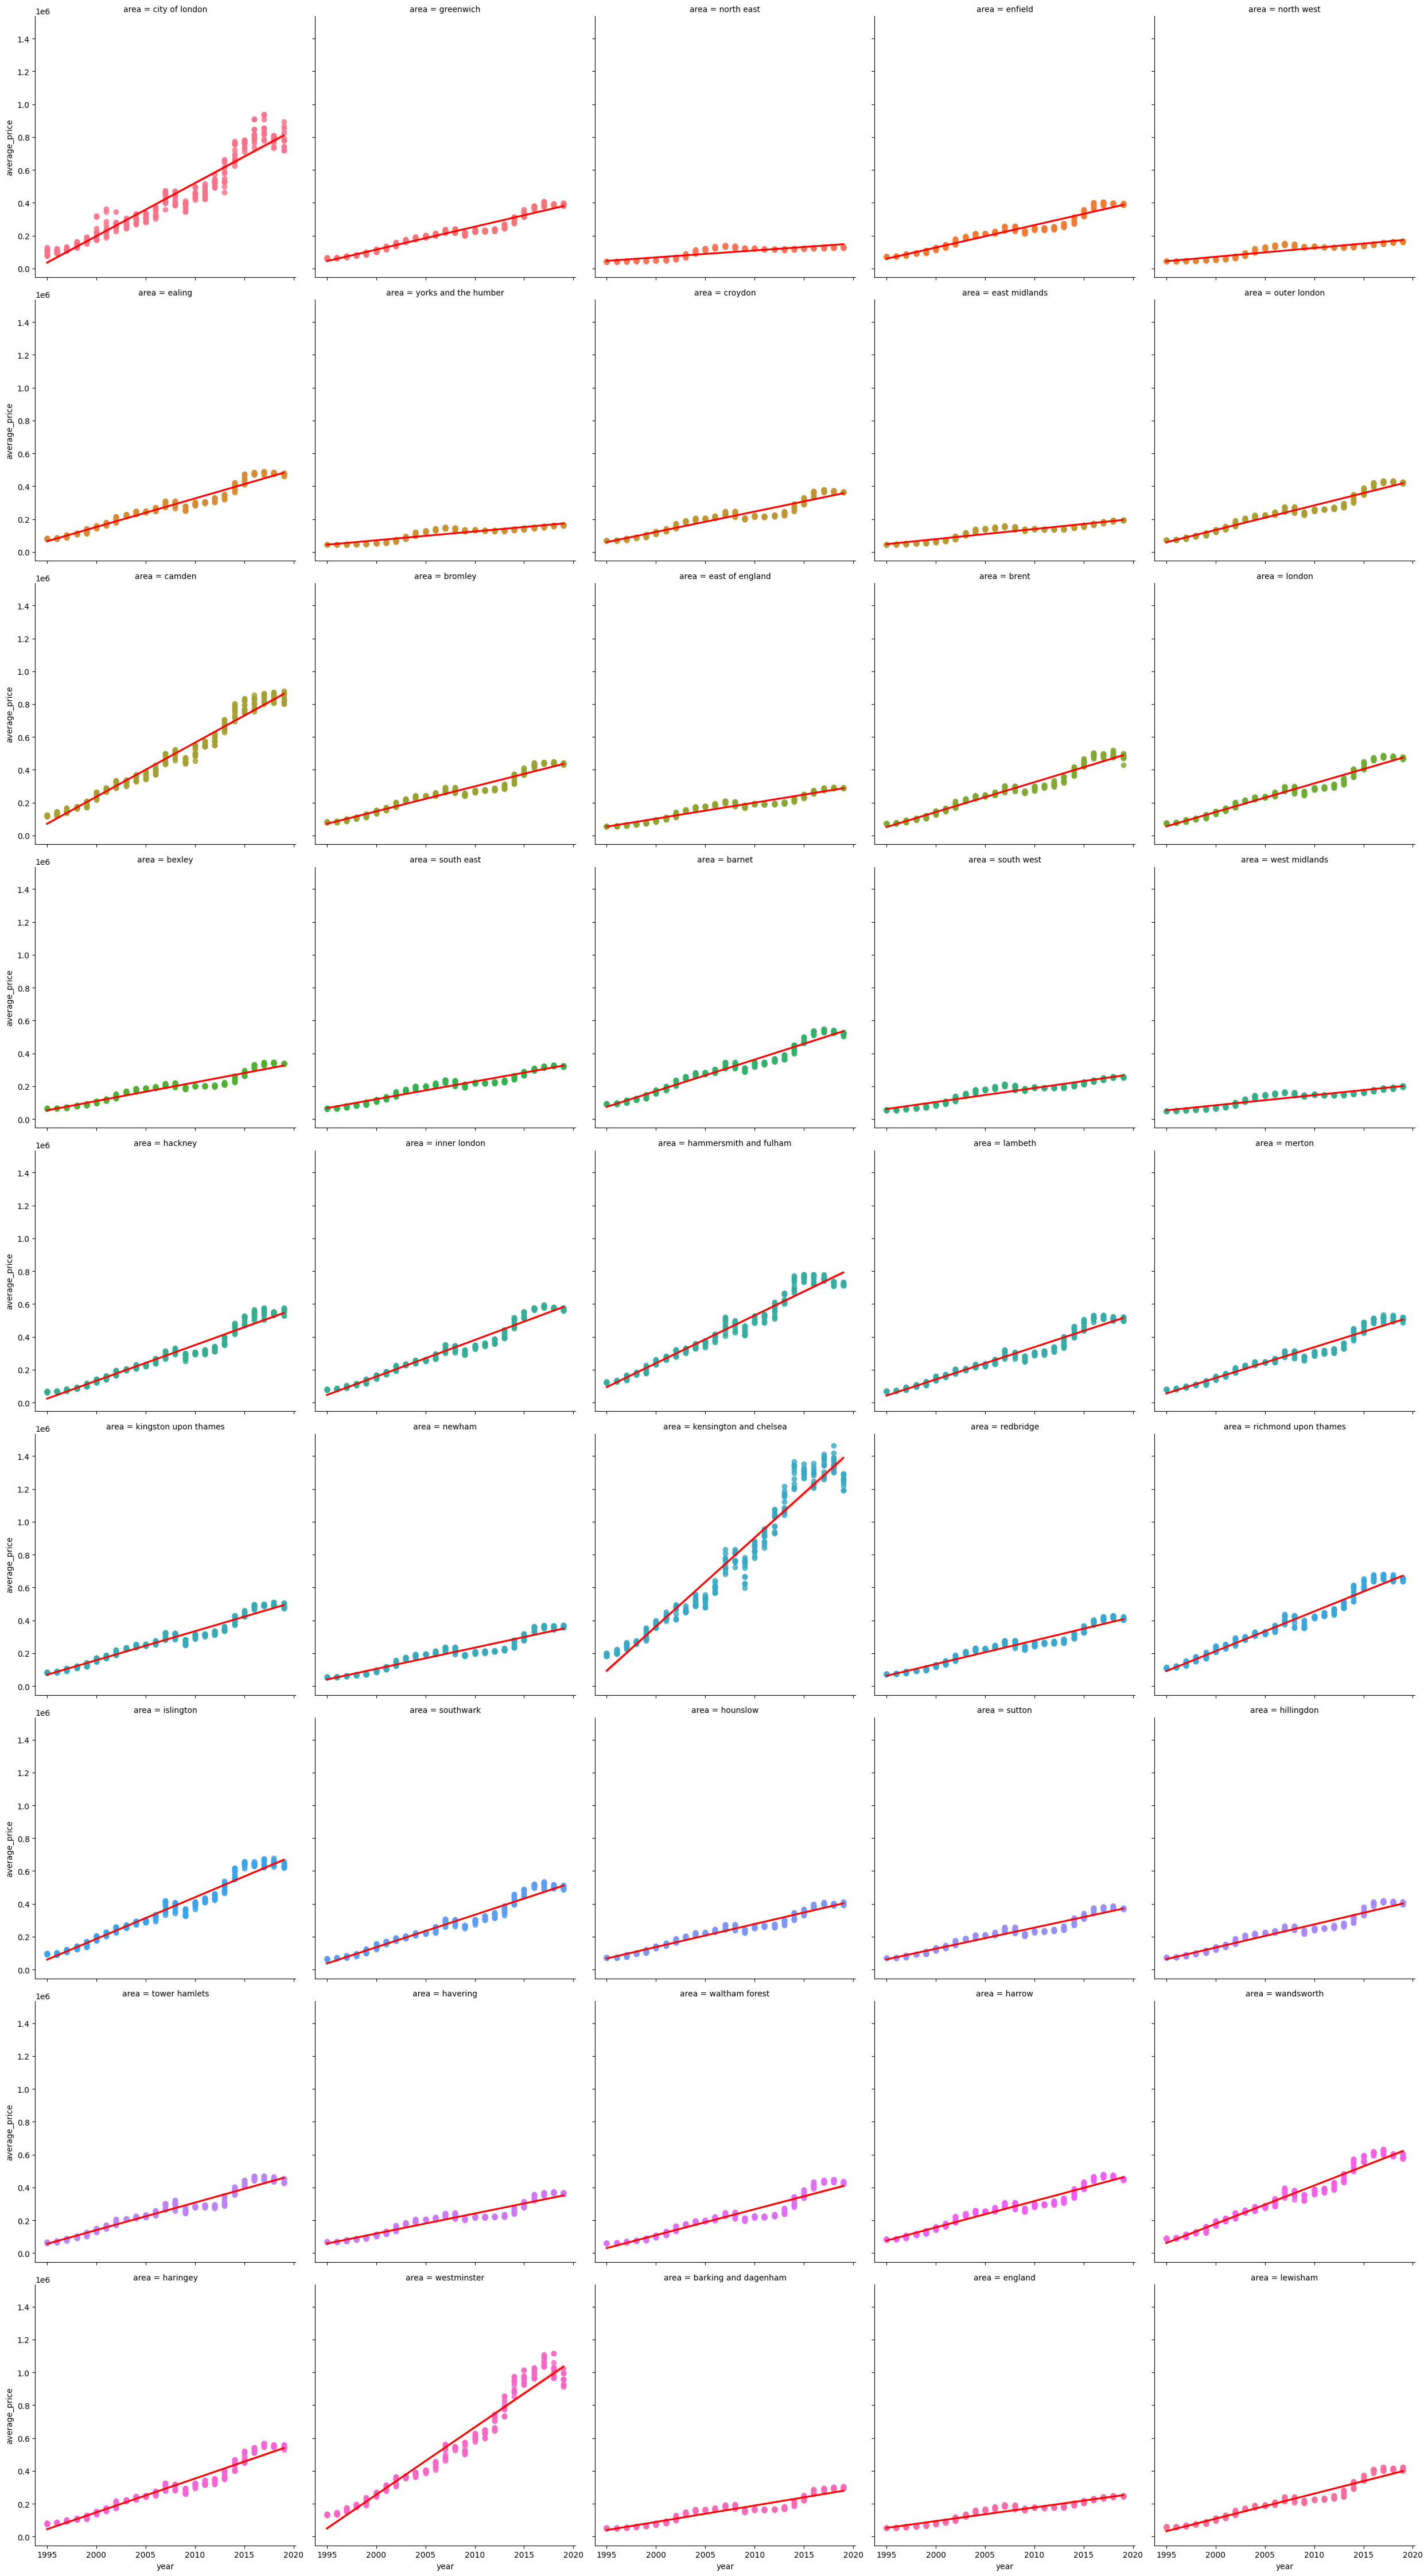

In [214]:
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='average_price',x='year',data=area_df,col="area", hue="area",col_wrap=5,line_kws={'color': 'red'})


In the Above Graph, we can see the areas with Drastic Change from 1996-2020 for average Prices. These are --
- city of london
- camden
- kensington and chelsea
- westminster
- hammersmith and fulham

## 5. How is the Houses Sold Count and Which areas have shown a drastic difference in houses Sold count over the years for each area??

In [266]:
area_df['area'].unique()

array(['city of london', 'greenwich', 'north east', 'enfield',
       'north west', 'ealing', 'yorks and the humber', 'croydon',
       'east midlands', 'outer london', 'camden', 'bromley',
       'east of england', 'brent', 'london', 'bexley', 'south east',
       'barnet', 'south west', 'west midlands', 'hackney', 'inner london',
       'hammersmith and fulham', 'lambeth', 'merton',
       'kingston upon thames', 'newham', 'kensington and chelsea',
       'redbridge', 'richmond upon thames', 'islington', 'southwark',
       'hounslow', 'sutton', 'hillingdon', 'tower hamlets', 'havering',
       'waltham forest', 'harrow', 'wandsworth', 'haringey',
       'westminster', 'barking and dagenham', 'england', 'lewisham'],
      dtype=object)

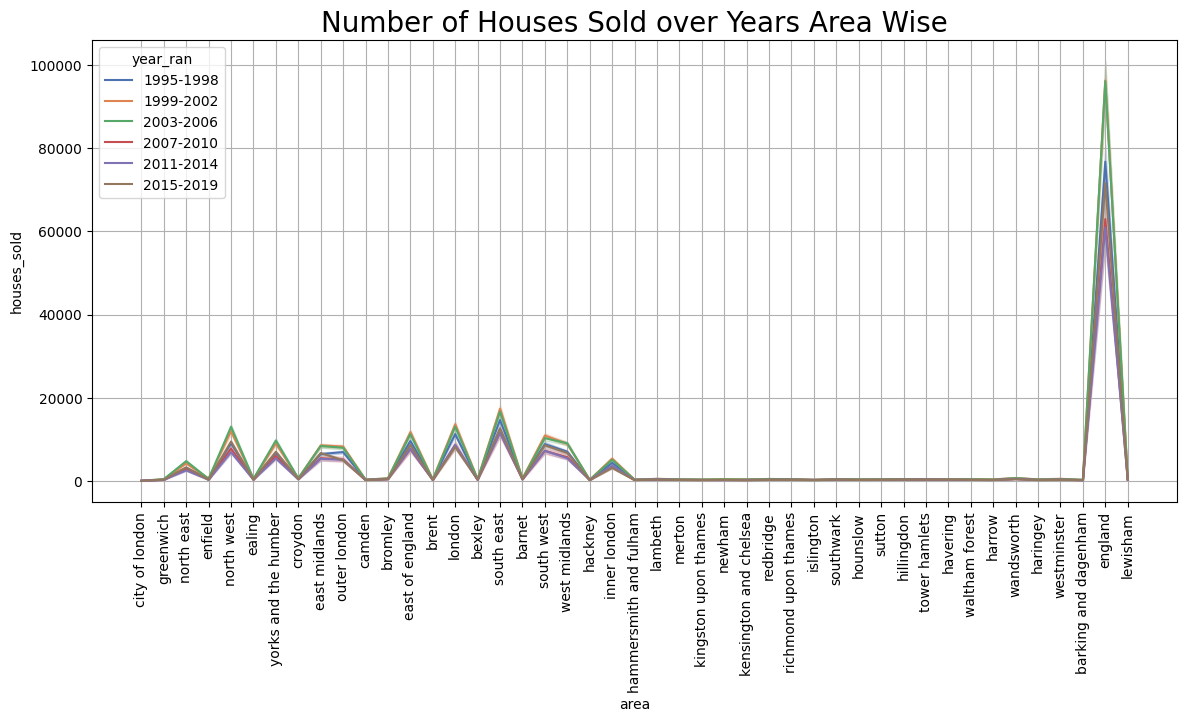

In [236]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='area', y='houses_sold', data=area_df, palette='deep', hue='year_ran')
plt.xticks(rotation=90)
plt.title('Number of Houses Sold over Years Area Wise',size=20)
plt.grid()

Houses Sold Count have decreased over years for most of the areas in our Data Set.

* Maximum Houses Sold is in England which is Non-Borough Flag Area.
* Minimum Houses sold is in City of London which is a Borough Flag Area.

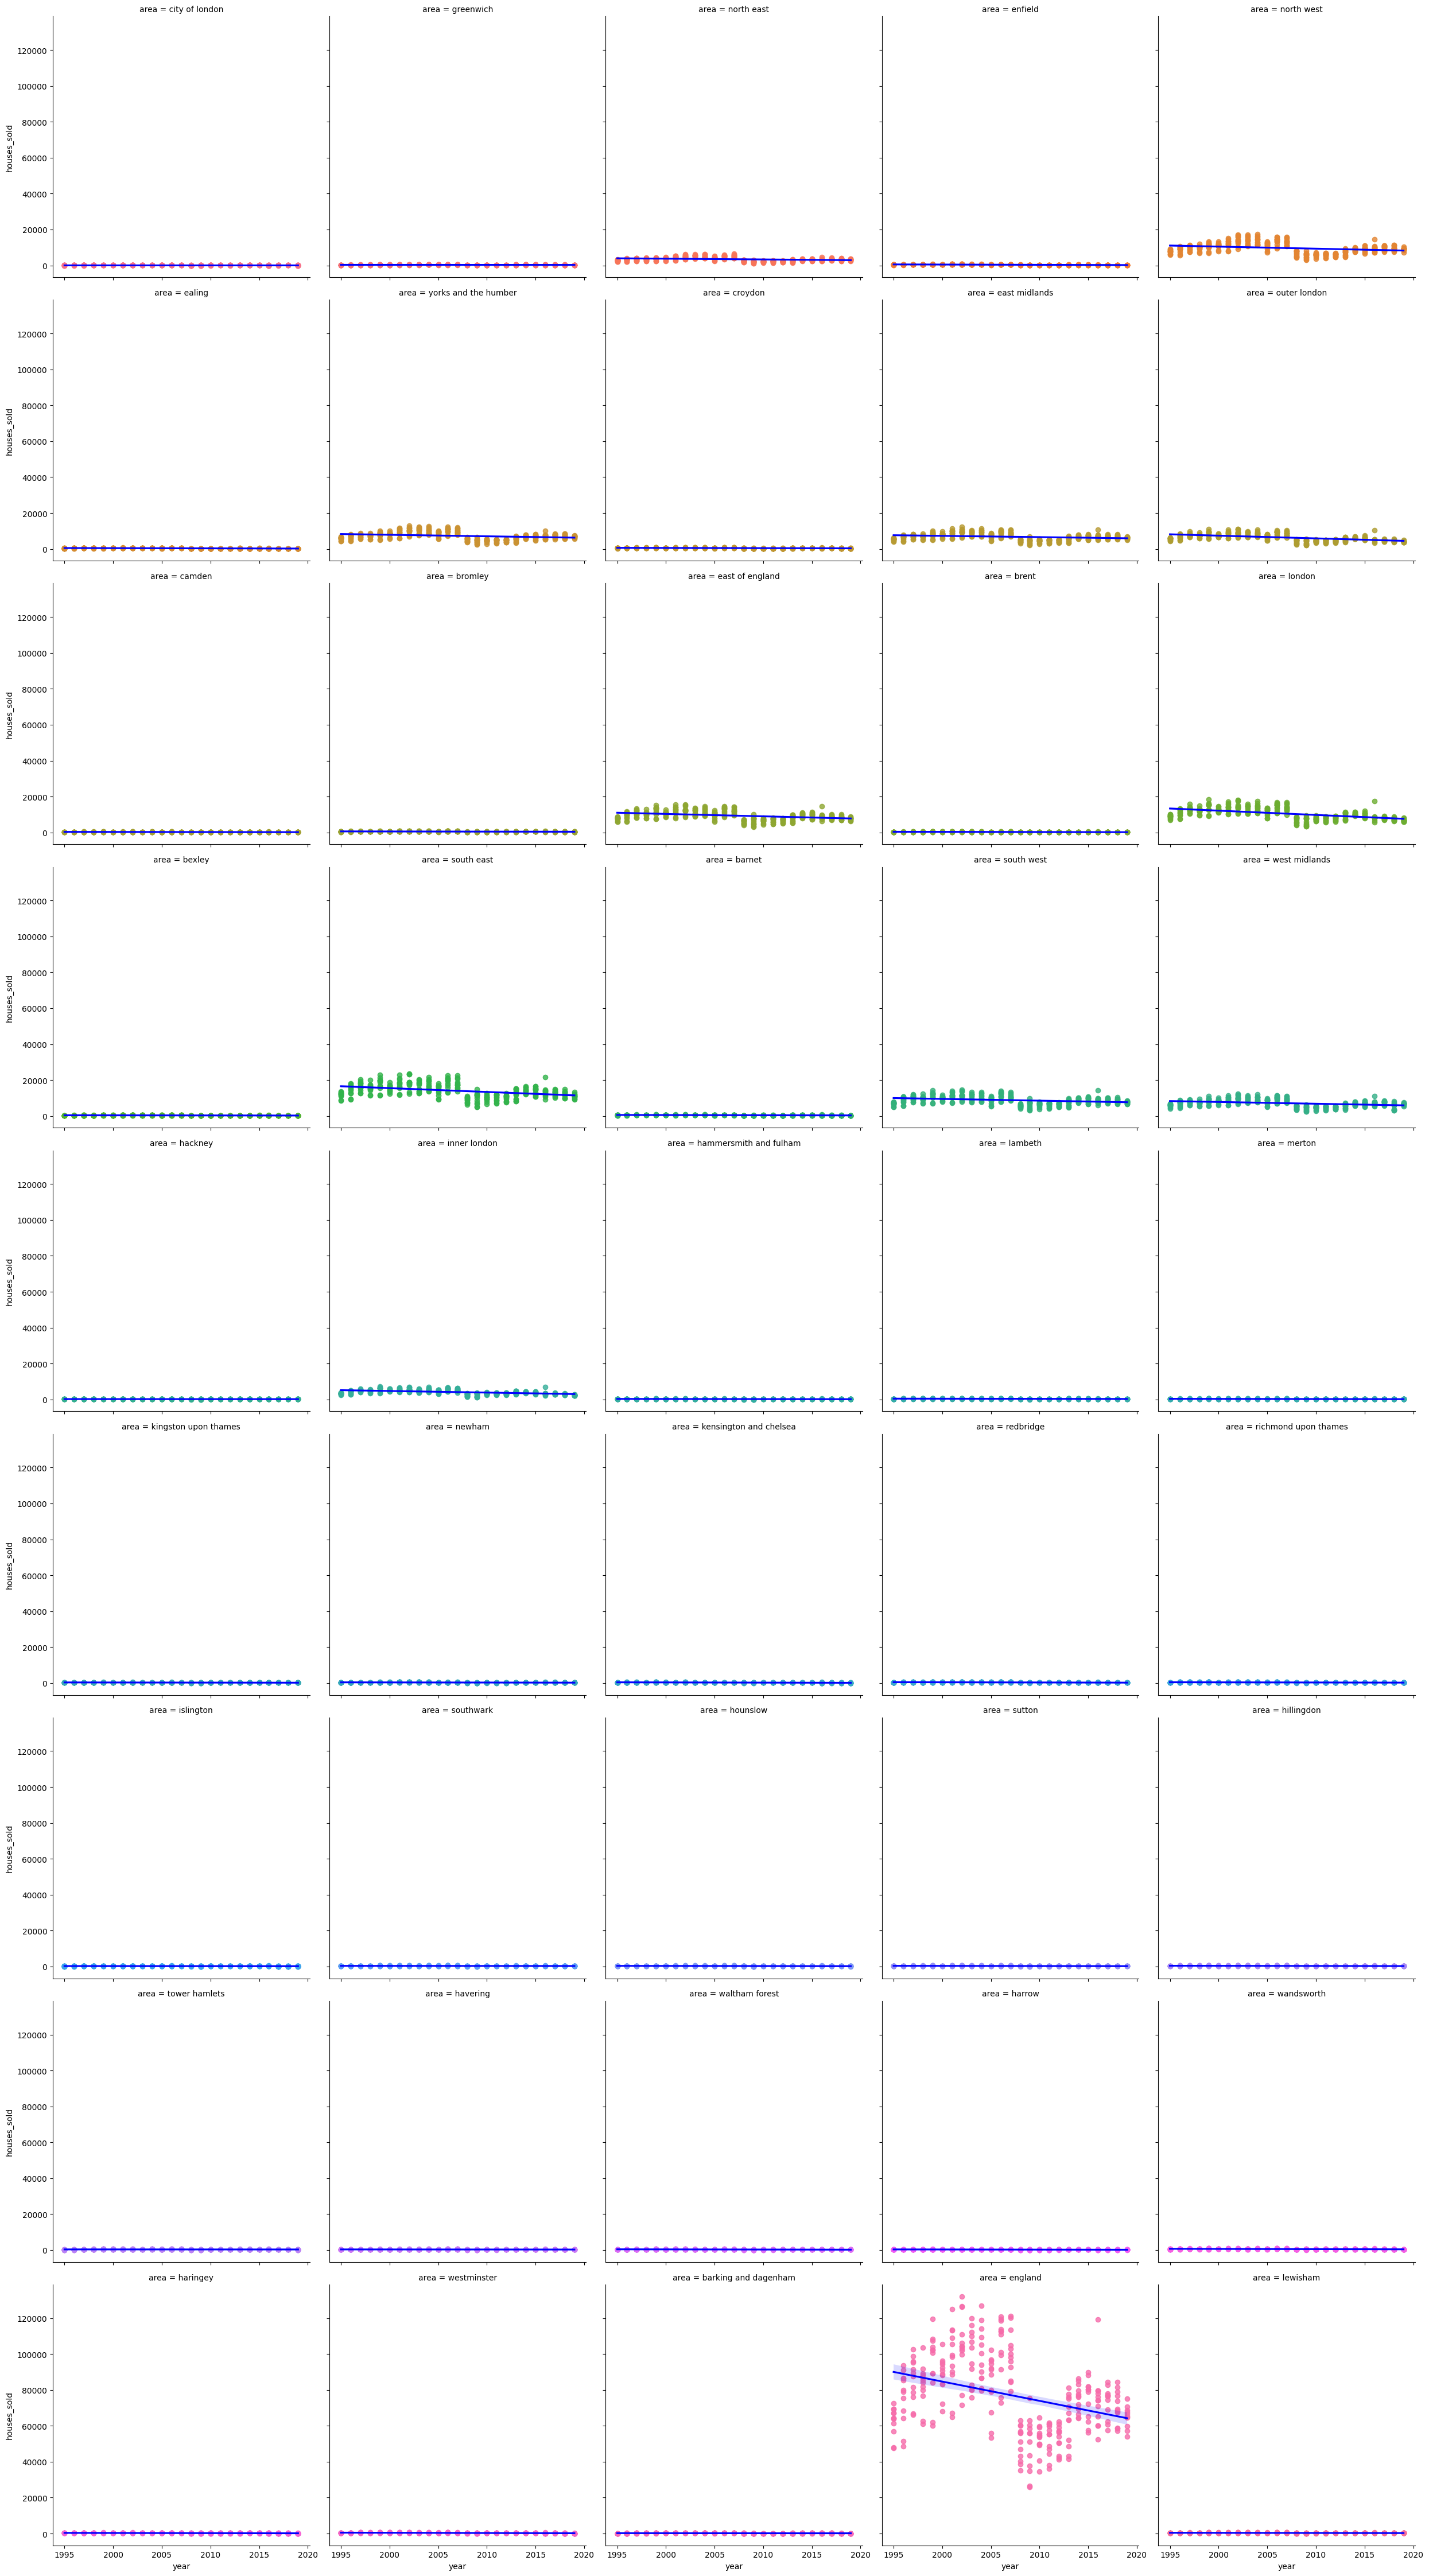

In [226]:
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='houses_sold',x='year',data=area_df,col="area", hue="area",col_wrap=5,line_kws={'color': 'blue'})

We can see the Frequency for Houses Sold Count is very small in most of the Areas. 

* But England shows a drastic Change in Houses Sold count. It means Houses Sold have decreased mostly in Area England.

In [227]:
area_df[area_df['houses_sold']==area_df['houses_sold'].min()]

date            area  average_price       code  houses_sold  \
7502 2008-11-01  city of london         396155  E09000001          2.0   

      borough_flag  year   year_ran  
7502             1  2008  2007-2010

In [237]:
# area_df.sort_values('houses_sold', ascending=True)[150:200]

### 6. What is the effect on avg_price of houses & houses_sold in areas coming from or coming not from borough flag of London??

In [141]:
area_df.head()

date            area  average_price       code  houses_sold  \
0 1995-01-01  city of london          91449  E09000001         17.0   
1 1995-01-01       greenwich          62300  E09000011        182.0   
2 1995-01-01      north east          42076  E12000001       1983.0   
3 1995-01-01         enfield          72515  E09000010        327.0   
4 1995-01-01      north west          43958  E12000002       5801.0   

   borough_flag  year  
0             1  1995  
1             1  1995  
2             0  1995  
3             1  1995  
4             0  1995

In [142]:
# area_df[area_df['borough_flag']==0]['area'].nunique()
# area_df1=area_df[area_df['borough_flag']==0]

Text(0.5, 1.0, 'Average Price of Houses in Areas Borough Flag Wise')

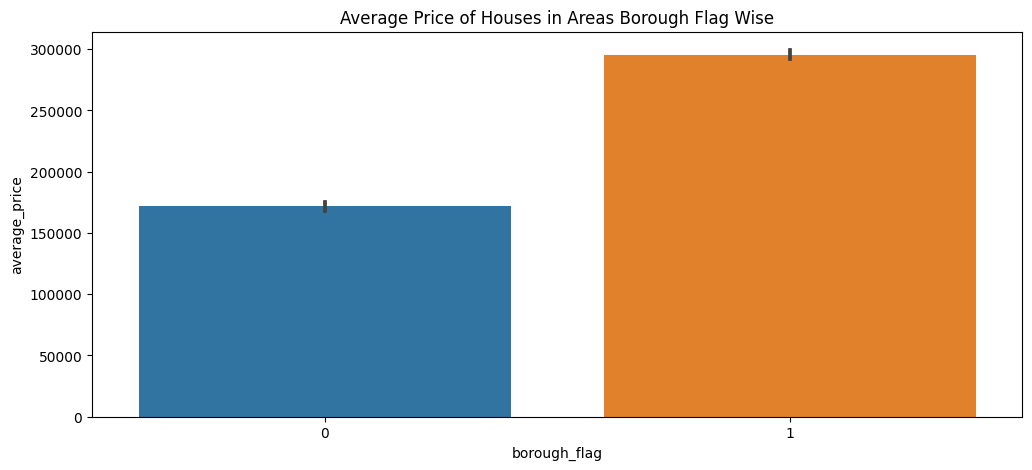

In [143]:
plt.figure(figsize=(12,5))
area_df[area_df['borough_flag']==1]['area'].nunique()
sns.barplot(x='borough_flag', y='average_price', data=area_df)
plt.title('Average Price of Houses in Areas Borough Flag Wise')
# plt.legend([0,1])

So, we got to know how Big is the Difference in Price of Houses in the Areas coming from borough_flag of London and in the areas not coming from borough_flag of London. \
* This conclude Areas in Borough Flag are expensive because of all the Benefits,facilities and Perks you are receiving there. \
* Areas not in Borough Flag are cheaper but comes with cost of less Benefits,facilities and Perks of living there except some areas like London.

Text(0.5, 1.0, 'Houses Sold in Areas Borough Flag Wise')

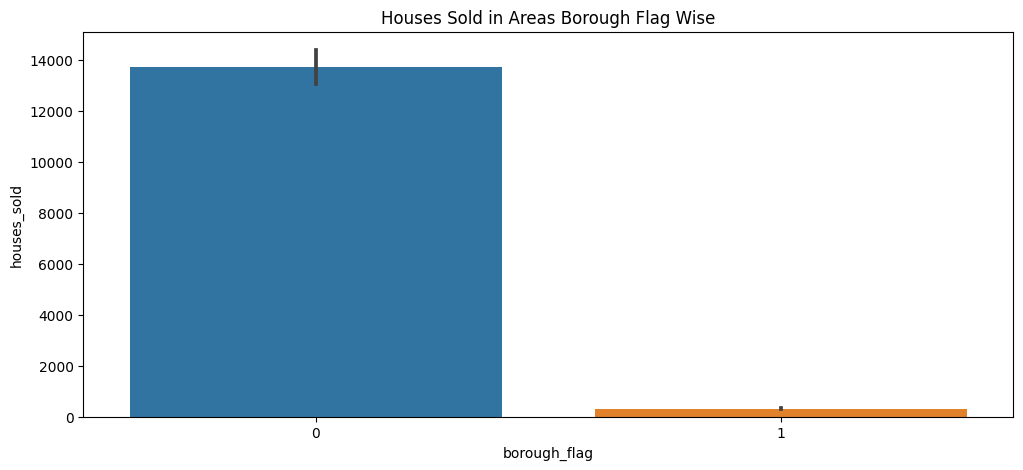

In [144]:
plt.figure(figsize=(12,5))

sns.barplot(x='borough_flag', y='houses_sold', data=area_df)
plt.title('Houses Sold in Areas Borough Flag Wise')

And Exactly the Opposite for Houses Sold Count in the Areas coming from borough_flag of London and in the areas not coming from borough_flag of London.

This Concludes Non Borough Flag areas are Sold More because of their less cost. \
Even if people who becomes financially better move to a Borough Flag area and sold their existing Non Borough Flag Area Houses.

## 7. What is the Most and Least Expensive year in terms of avg_price of houses? ?

In [ ]:
area_df2= area_df.groupby('year')['average_price'].mean().reset_index()
# area_df3

<Axes: xlabel='year', ylabel='average_price'>

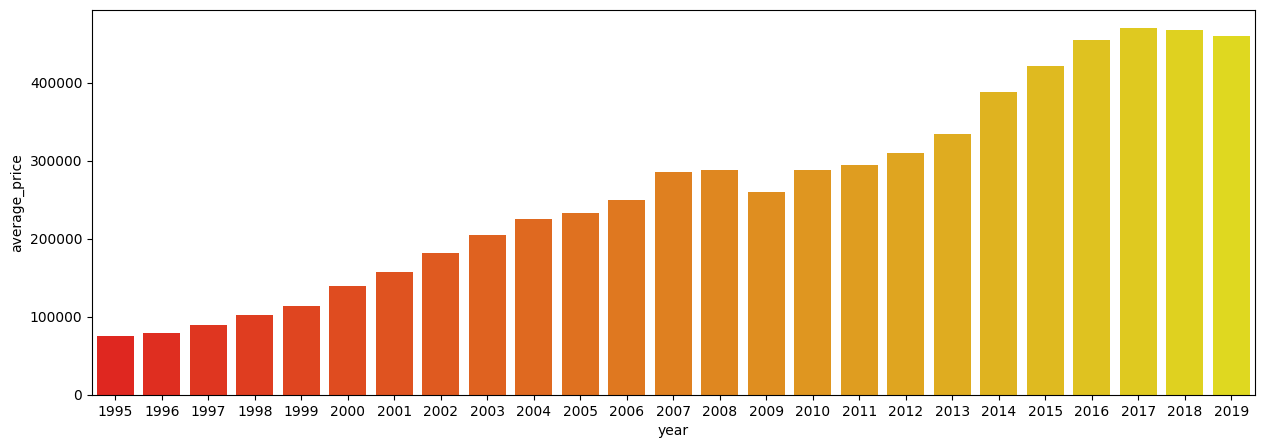

In [246]:
plt.figure(figsize=(15,5))
sns.barplot(x='year',y='average_price', data=area_df2,palette='autumn')

* So, the Most Expensive year in terms of Average Price of Houses is 2017
**and**
* The Least Expensive year in terms of Average Price of Houses is 1995.

### 7. Which year led to most and least Sold Houses and Why??

In [146]:
area_df3= area_df.groupby('year')['houses_sold'].mean().reset_index()
# area_df3

<Axes: xlabel='year', ylabel='houses_sold'>

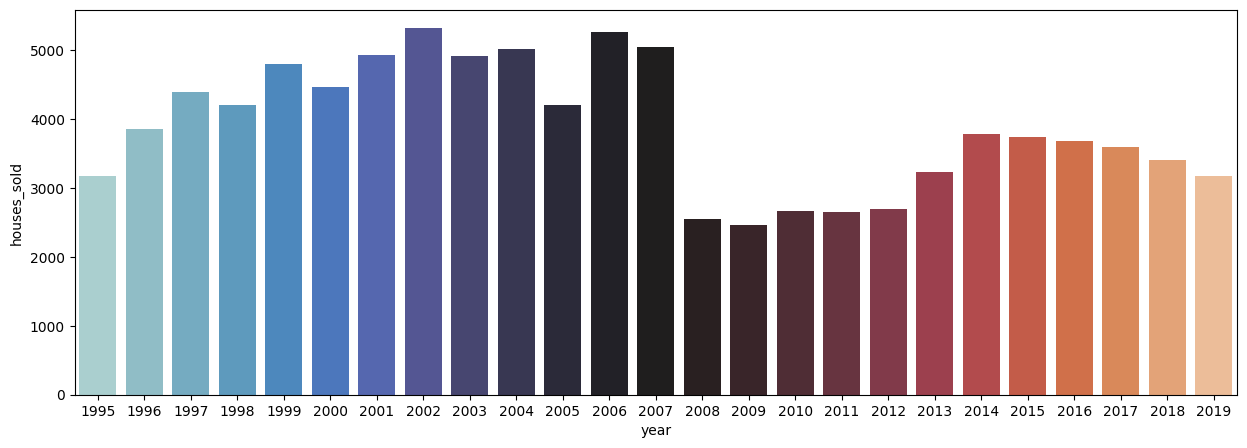

In [147]:
plt.figure(figsize=(15,5))
sns.barplot(x='year',y='houses_sold', data=area_df3,palette='icefire')

* The Houses Sold Count was most in year 2002 **and**
* The Houses Sold count was least in year 2009.

* There's a huge downfall in the year 2008 for Houses Sold Count.

## Problem Statement


In [148]:
# year_df.head()

1. Correlation b/w columns
2. What is the distribution for Borough/Non Borough Flag Areas??
3. What's the Median and Mean Salary of People living in borough/non borough flag areas??
4. what's the recycling_pct, no of jobs, area_size, no of houses, population_size of People living in borough/non borough flag areas??
5. What's the area and population size for each area (Max & Min Population Area)??
6. Which Area have the highest/lowest Avg Salary Over the years for people living there??
7. What's the number of jobs, number of houses over for each area (Max & Min)??
8. Have Recycling Pct for Houseshold Increased/Decreased over the year timeframe for each area??


# 1. Correlation b/w columns

In [149]:
year_df.columns

Index(['code', 'area', 'date', 'median_salary', 'mean_salary', 'recycling_pct',
       'population_size', 'number_of_jobs', 'area_size', 'no_of_houses',
       'borough_flag', 'year'],
      dtype='object')

In [150]:
year_df1=year_df[['date','median_salary', 'mean_salary', 'recycling_pct',
       'population_size', 'number_of_jobs', 'area_size', 'no_of_houses',
       ]]
year_df1

date  median_salary  mean_salary  recycling_pct  population_size  \
0    1999-12-01        33020.0      48922.0       0.000000           6581.0   
1    1999-12-01        21480.0      23620.0       3.000000         162444.0   
2    1999-12-01        19568.0      23128.0       8.000000         313469.0   
3    1999-12-01        18621.0      21386.0      18.000000         217458.0   
4    1999-12-01        18532.0      20911.0       6.000000         260317.0   
...         ...            ...          ...            ...              ...   
1015 2018-12-01        29633.0      36757.0      26.893365       64553909.0   
1016 2018-12-01        29667.0      36973.0      26.893365       59115809.0   
1017 2018-12-01        27101.0      31158.0      26.893365        1881641.0   
1018 2018-12-01        29289.0      34604.0      26.893365        5438100.0   
1019 2018-12-01        26353.0      30347.0      26.893365        3138631.0   

      number_of_jobs  area_size  no_of_houses  
0           160000.0     4323.0      102396.0  
1           160000.0     4323.0      102396.0  
2           160000.0     4323.0      102396.0  
3           160000.0     4323.0      102396.0  
4           160000.0     4323.0      102396.0  
...              ...        ...           ...  
1015      34850000.0     4323.0      102396.0  
1016      31989000.0     4323.0      102396.0  
1017        900000.0     4323.0      102396.0  
1018       2861000.0     4323.0      102396.0  
1019       1496000.0     4323.0      102396.0  

[994 rows x 8 columns]

In [151]:
year_df1.corr()

date  median_salary  mean_salary  recycling_pct  \
date             1.000000       0.570886     0.389921       0.678687   
median_salary    0.570886       1.000000     0.942396       0.244746   
mean_salary      0.389921       0.942396     1.000000       0.122418   
recycling_pct    0.678687       0.244746     0.122418       1.000000   
population_size  0.014395      -0.178185    -0.125162       0.066164   
number_of_jobs   0.047359      -0.145558    -0.097750       0.075460   
area_size        0.022969      -0.048340    -0.029560       0.092425   
no_of_houses     0.038417      -0.021789    -0.000010       0.096087   

                 population_size  number_of_jobs  area_size  no_of_houses  
date                    0.014395        0.047359   0.022969      0.038417  
median_salary          -0.178185       -0.145558  -0.048340     -0.021789  
mean_salary            -0.125162       -0.097750  -0.029560     -0.000010  
recycling_pct           0.066164        0.075460   0.092425      0.096087  
population_size         1.000000        0.972967   0.408337      0.405484  
number_of_jobs          0.972967        1.000000   0.421583      0.418020  
area_size               0.408337        0.421583   1.000000      0.987604  
no_of_houses            0.405484        0.418020   0.987604      1.000000

<Axes: >

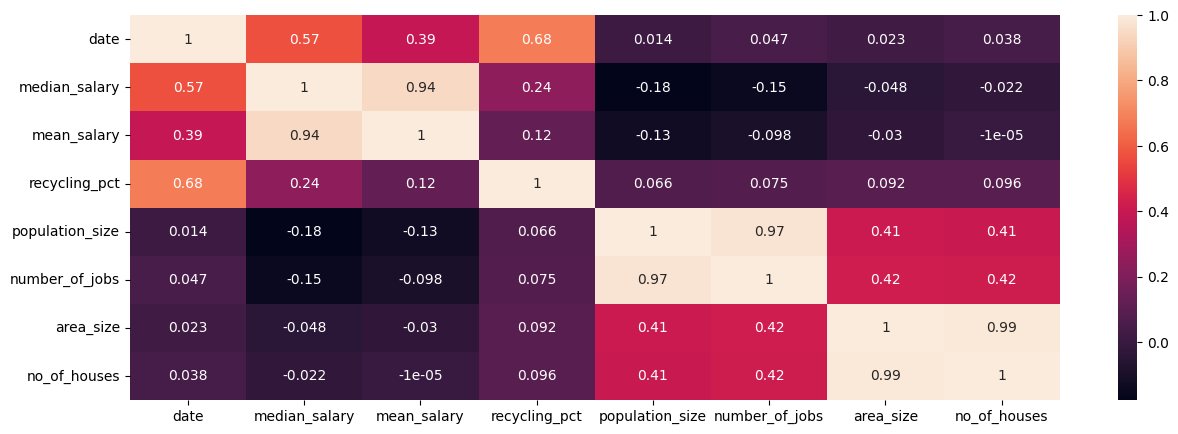

In [152]:
plt.figure(figsize=(15,5))
sns.heatmap(year_df1.corr(), annot=True)

##### Here with Date:
* Recyling_pct: Have a high +ive corelation. It means House Hold Recycling have increased over years.
* median_salary & mean_salary: Have a good +ive corelation. 
* While Date Have near to 0 corelation with population_size, number_of_jobs, area_size, no_of_houses. This show that these
  column parameters have remain same or have very small change over the timeframe (1999-2018)

##### Median & Mean Salary are +ively Corelated. 
* It shows the mean and median of a data set are close together.The data set has a symmetrical distribution.

##### Both Mean & Median Salary have -ive Corelation with
* So Salary of People is less where Population is more and Number of Jobs are more.
* And if Population is more area size and number of Houses will be more.

##### While for Other Columns population_size, number_of_jobs, area_size, no_of_houses have a strong +ive Corelation with Each Other.
* Jobs are more in Bigger Area Size areas with higher population Size with higher number of houses.
* Population is more where Area is more , number of houses are more and number of jobs are more.

##### Recycling % have near to 0 corelation with 
- Population Size
- Area Size
- No of Jobs
- No of Houses
* It have a slight +ive corelation with Salary columns.





# 2. What is the distribution for Borough/Non Borough Flag Areas??

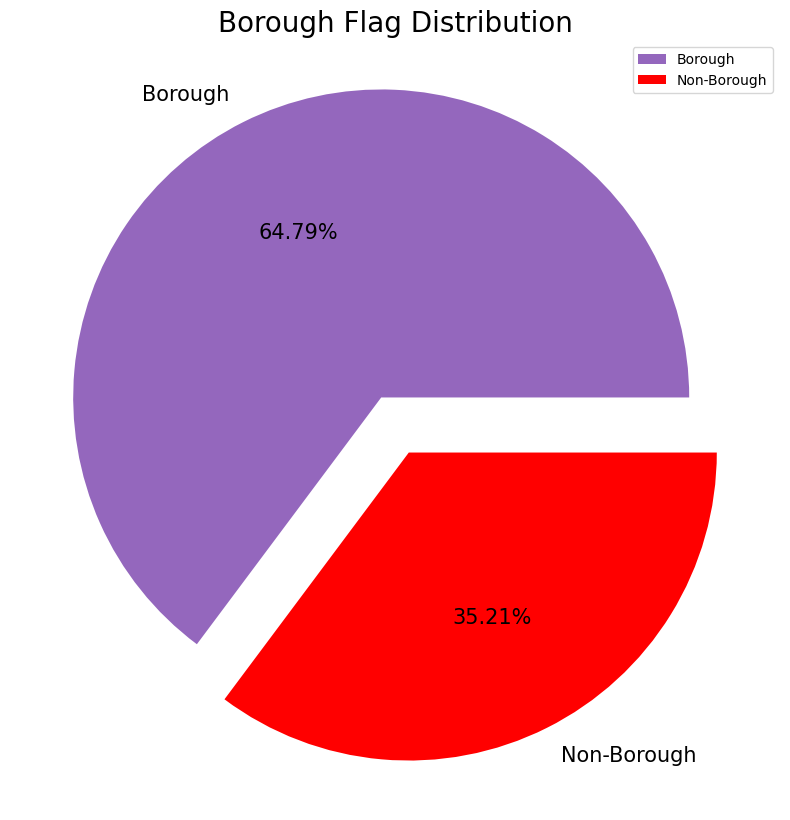

In [264]:
data = year_df['borough_flag'].value_counts()
labels = ['Borough','Non-Borough']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0.1,0.1)
colors = ['C4', 'r']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Borough Flag Distribution',size=20,loc='center')
plt.legend()

**Again the Uneven Distribution of Borough, Non-Borough Flag Areas which is the main reason for skewness and outlier values in our dataset**

## 3. What's the Median and Mean Salary of People living in borough/non borough flag areas??

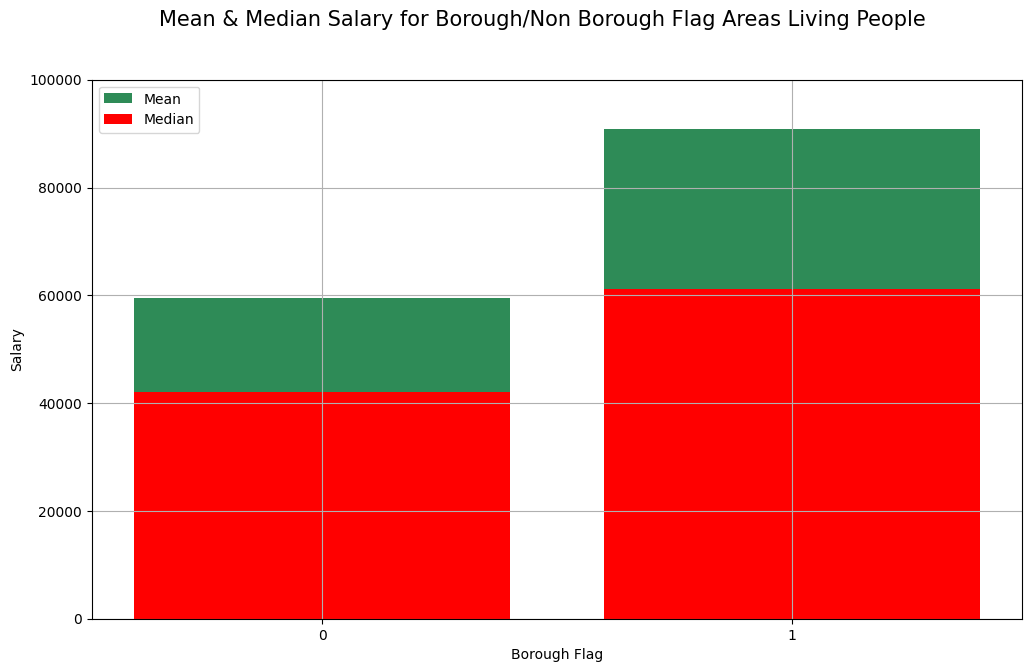

In [153]:
fig,axes=plt.subplots(figsize=(12,7))
fig.suptitle('Mean & Median Salary for Borough/Non Borough Flag Areas Living People',size=15)
plt.bar(year_df['borough_flag'], year_df['mean_salary'],color='seagreen')
plt.bar(year_df['borough_flag'], year_df['median_salary'], color='red')
plt.ylim(0,100000)
plt.xticks([0, 1])
plt.xlabel('Borough Flag')
plt.ylabel('Salary')
plt.legend(labels={'Mean','Median'})
plt.grid()
# axes[0].bar(year_df['borough_flag'], year_df['median_salary'])
# plt.ylim(0,80000)
# # plt.xlabel('Borough Flag')
# ax.set_ylabel('Median Salary')
# plt.xticks([0, 1])

# # for ax in axes.flat:
# #     ax.set(xlabel='Borough Flag')

We can see the difference in the Mean & Median Salary of People living in Borough and Non-Borough Flag Areas.

* People living in Borough Flag Areas are having higher salary which justify why our 'area_df' Dataset Average Price of Houses are higher in Borough flag Areas and Houses Sold count is less in Borough Flag Areas
* The Mean Salary and Median Salary are positively corelated and have a consistent growth over the Years for both Borough and Non-Borough Flag Areas living People.



## 4. How's the recycling_pct, no of jobs, area_size, no of houses, population_size of People living in borough/non borough flag areas (1999-2018)??

In [199]:
year_df['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [200]:
def range(x):
    if x<=2002:
        return '1999-2002'
    elif x>2002 and x<=2006:
        return '2003-2006'
    elif x>2006 and x<=2010:
        return '2007-2010'
    elif x>2010 and x<=2014:
        return '2011-2014'
    else:
        return '2015-2018'

year_df['year_ran']= year_df['year'].apply(lambda x: range(x))

In [201]:
year_df['year_ran']= year_df['year'].apply(lambda x: range(x))
# year_df

Text(0.5, 0, '[]')

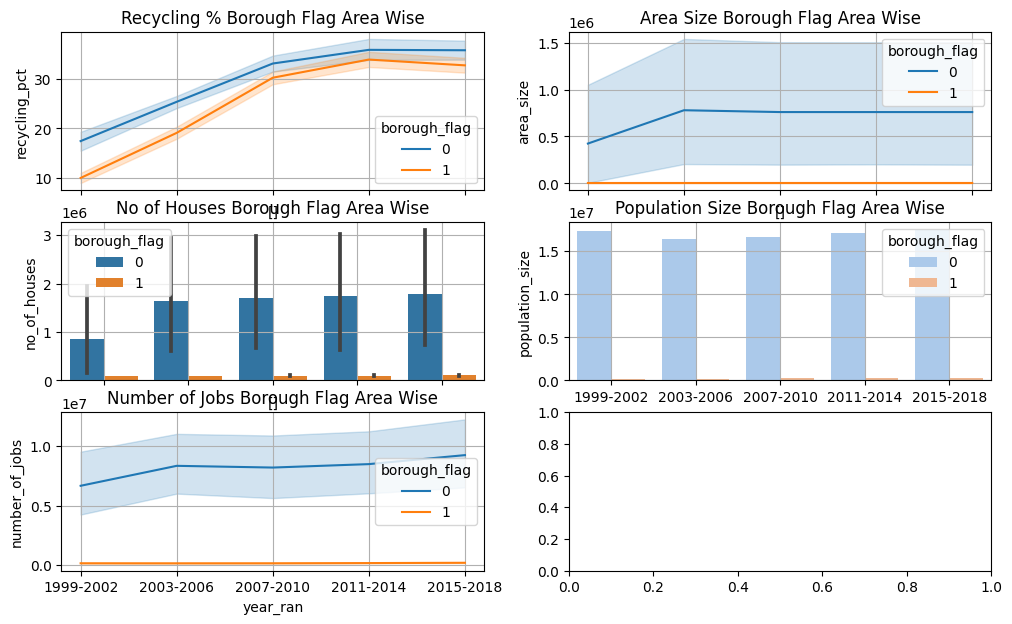

In [202]:
fig,ax=plt.subplots(3,2, figsize=(12,7))
# fig.suptitle('Recycling_pct, No of Jobs, Area_Size, No of Houses, Population_Size of People living in borough/Non-borough flag Areas Over Years',size=15)
sns.lineplot(ax=ax[0,0],hue='borough_flag', y='recycling_pct',x='year_ran',data=year_df)
ax[0,0].set_title("Recycling % Borough Flag Area Wise")
sns.lineplot(ax=ax[0,1],hue='borough_flag', y='area_size',x='year_ran',data=year_df)
ax[0,1].set_title("Area Size Borough Flag Area Wise")
# sns.set(rc={"figure.figsize":(5, 3)})
# ax[0,0].set_xlabel('year_ran',size=8)
# ax[0,1].set_xlabel('year_ran',size=8)
ax[0,0].set_xticklabels([])
ax[0,0].set_xlabel([])
ax[0,0].grid()
ax[0,1].set_xticklabels([])
ax[0,1].set_xlabel([])
ax[0,1].grid()
sns.barplot(ax=ax[1,0],hue='borough_flag', y='no_of_houses',x='year_ran',data=year_df)
ax[1,0].set_title("No of Houses Borough Flag Area Wise")
ax[1,0].grid()
# fig.subplots_adjust(top=.9)
sns.barplot(ax=ax[1,1],hue='borough_flag', y='population_size',x='year_ran',data=year_df, palette='pastel',ci=None)
ax[1,1].set_title("Population Size Borough Flag Area Wise")
ax[1,1].grid()
sns.lineplot(ax=ax[2,0],hue='borough_flag', y='number_of_jobs',x='year_ran',data=year_df)
ax[2,0].set_title("Number of Jobs Borough Flag Area Wise")
ax[2,0].grid()
ax[1,0].set_xticklabels([])
ax[1,0].set_xlabel([])

* Recycling % have increase for both Non-Borough/Borough Flag Areas over the years. Reycling % have increased more in Non_Borough Flag Areas which can be because of more population and houses there.

* All other column Values have increased gradually for Non-Borough Flag Areas over the years. It's the 2007-2010 year range when number of jobs, population size, and area size have quite downfall.

* Population Size, 
Area Siz, 
No of Jo,No of Houses have remain nearly constant over the years for Borough Flag Areas.  buas.

## 5. What's the area and population size over for each area (Max & Min Population Area)??

In [268]:
yl=(year_df['area'].nunique())
yl

51

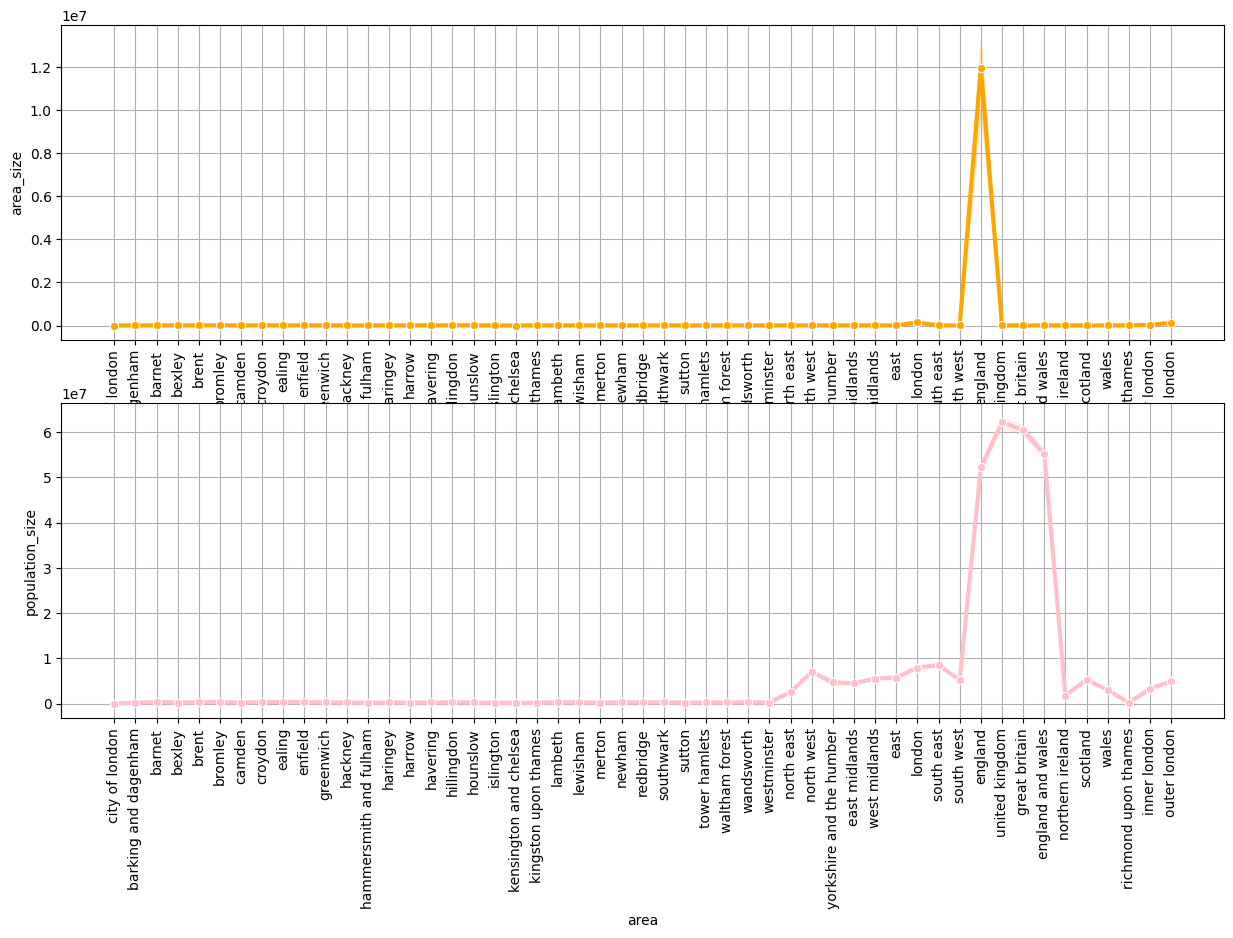

In [159]:
fig, ax = plt.subplots(2,1, figsize=(15, 9))
sns.lineplot(ax=ax[0], x='area', y='area_size', data=year_df, color='orange',marker='o',linewidth=3)
sns.lineplot(ax=ax[1], x='area', y='population_size', data=year_df, color='pink',marker='o',linewidth=3)
ax[0].set_xticklabels(yl, rotation=90)
ax[1].set_xticklabels(yl, rotation=90)
# plt.xticks(rotation=90)
ax[0].grid()
ax[1].grid()
# plt.ylim(0, 100000)

The Area Size and Population Size have are highly and positively corelated with each other as we saw in above heatmap.

* So the Minimum Area & Population Size is in City of London, a Borough Flag Area.
- Min Area Size= 315.0 Hectares
- Min Population Size= 6581.0

* Maximum Area Size is in England which is (13303728.0Hectares) in Non_borough Flag Areas.
* Maximum Population Size is in United Kingdom (66435550.0) followed by 
- Great Britain
- England and Wales
- England
* All these Max Population Size Areas are Non Borough Flag Areas.

In [300]:
# year_df.sort_values('area_size', ascending=False)[0:60]

In [301]:
year_df[year_df['population_size']==year_df['population_size'].min()]

code            area       date  median_salary  mean_salary  \
0  E09000001  city of london 1999-12-01        33020.0      48922.0   

   recycling_pct  population_size  number_of_jobs  area_size  no_of_houses  \
0            0.0           6581.0        160000.0     4323.0      102396.0   

   borough_flag  year   year_ran  
0             1  1999  1999-2002

In [161]:
year_df[year_df['area_size']==year_df['area_size'].max()].head(2)

code     area       date  median_salary  mean_salary  recycling_pct  \
146  E92000001  england 2001-12-01        19997.0      24505.0           13.0   
197  E92000001  england 2002-12-01        20706.0      25542.0           15.0   

     population_size  number_of_jobs   area_size  no_of_houses  borough_flag  \
146       49449746.0      25430000.0  13303728.0    21206812.0             0   
197       49679267.0      25628000.0  13303728.0    21353516.0             0   

     year   year_ran  
146  2001  2003-2006  
197  2002  2003-2006

## 6. Which Area have the highest/lowest Avg Salary Over the years for people living there??

In [203]:
year_df.year.unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

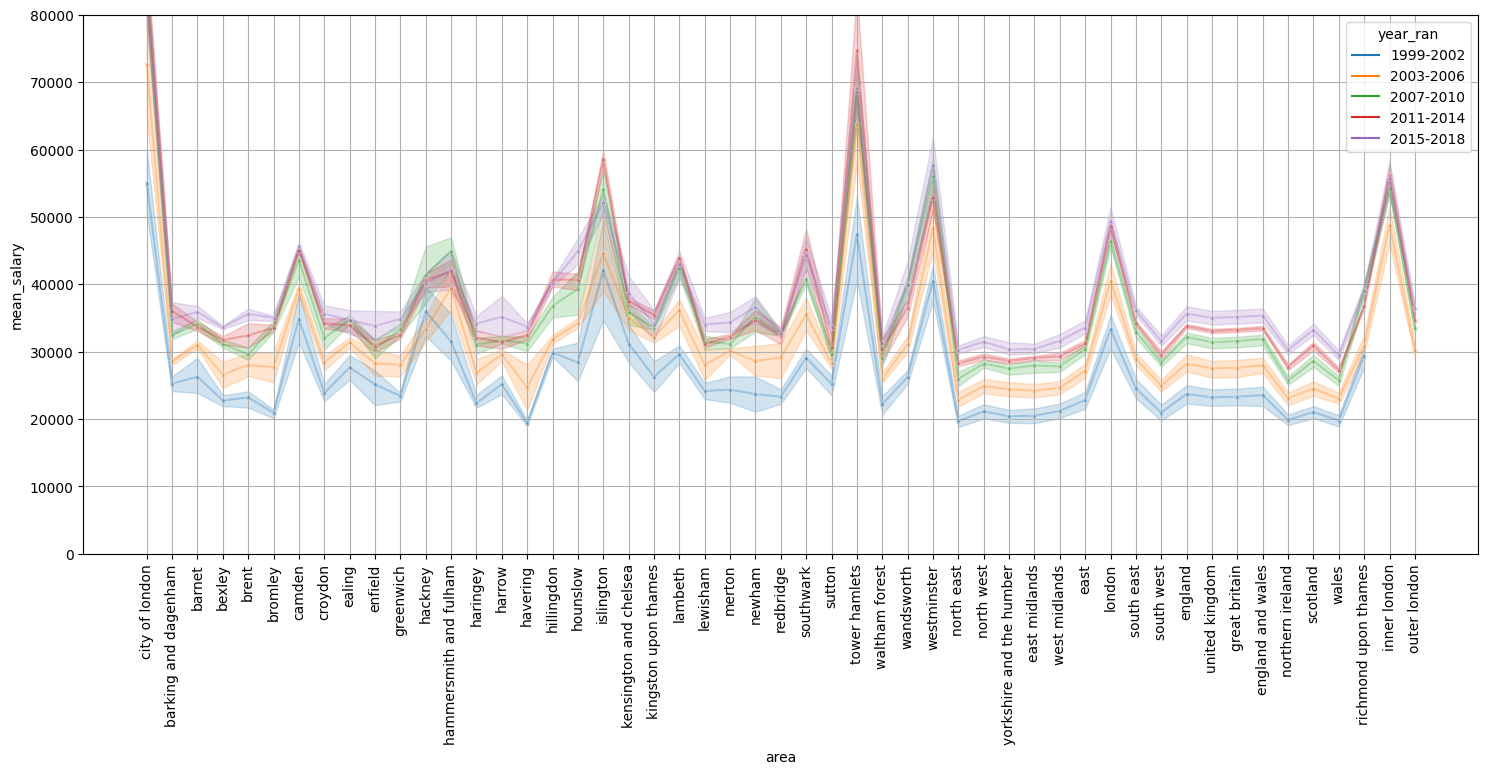

In [204]:
plt.figure(figsize=(18,7))
sns.lineplot(x='area', y='mean_salary',data=year_df, hue='year_ran',alpha=0.3, marker='*')
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.grid()

* We can observe that as the Year Increased, the avg salary have increased for all the areas with City of London having the highest Avg Salary among all other areas. Followed by Tower Hamlets, Westminster,  Inner London, Islington and London.

* All Areas with higher Average Salary are Borough Flag Areas. This means people living in Borough Flag have indeed higher salary.

* London and Inner London are the only exception for it's higher avg salary while coming under Non Borough Flag Areas.

* The Avg Salary is lowest for North East followed by Havering, Wales, Northern Ireland and South West over the years from 1999-2018.

In [164]:
year_df[year_df['mean_salary']==year_df['mean_salary'].min()]

code        area       date  median_salary  mean_salary  \
33  E12000001  north east 1999-12-01        16282.0      18351.0   

    recycling_pct  population_size  number_of_jobs  area_size  no_of_houses  \
33            5.0        2550314.0        160000.0     4323.0      102396.0   

    borough_flag  year   year_ran  
33             0  1999  1999-2002

In [262]:
# year_df.sort_values('mean_salary',ascending=True)[10:60]

In [178]:
year_df[year_df['mean_salary']==year_df['mean_salary'].max()]

code            area       date  median_salary  mean_salary  \
612  E09000001  city of london 2011-12-01        54381.0      90842.0   

     recycling_pct  population_size  number_of_jobs  area_size  no_of_houses  \
612           37.0           7412.0        436000.0      315.0        5513.0   

     borough_flag  year   year_ran  
612             1  2011  2011-2014

## 7. What's the number of jobs, number of houses over for each area (Max & Min)??

In [165]:
# fig,axes=plt.subplots(figsize=(12,7))
# fig.suptitle('Mean & Median Salary for Borough/Non Borough Flag Areas Living People',size=15)
# plt.bar(year_df[year_df['year_ran']=='1996-2000']['area'], year_df[year_df['year_ran']=='1996-2000']['mean_salary'],color='seagreen',alpha=0.5)
# plt.bar(year_df[year_df['year_ran']=='2001-2005']['area'], year_df[year_df['year_ran']=='2001-2005']['mean_salary'],alpha=0.2)
# plt.ylim(0,100000)
# plt.xticks(rotation=90)
# plt.xlabel('Borough Flag')
# plt.ylabel('Salary')
# # plt.legend(labels={'Mean','Median'})
# plt.grid()

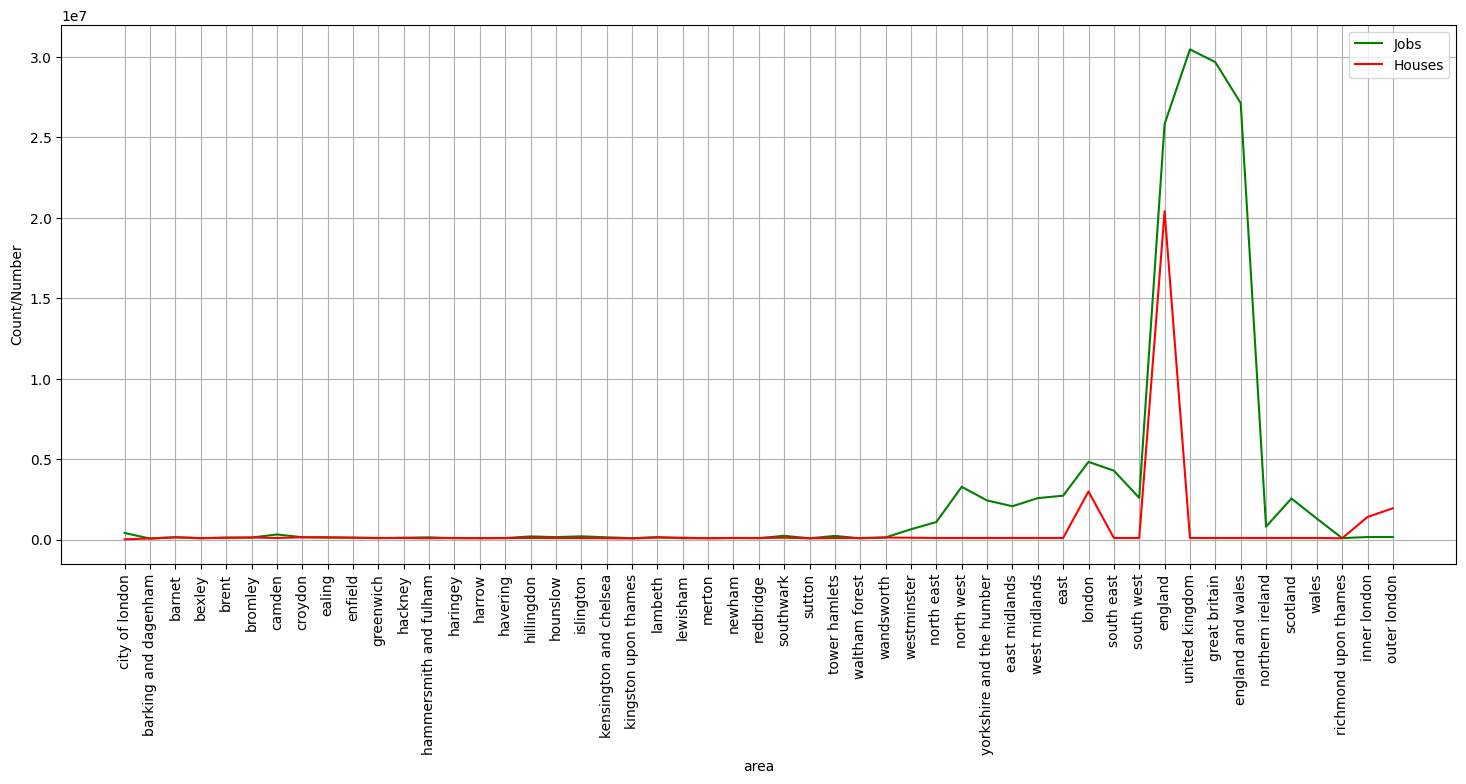

In [166]:
plt.figure(figsize=(18,7))
sns.lineplot(x='area', y='number_of_jobs',data=year_df, ci=None, color='green')
sns.lineplot(x='area', y='no_of_houses',data=year_df, ci=None, color='red')
plt.xticks(rotation=90)
plt.legend(labels=['Jobs', 'Houses'])
plt.ylabel('Count/Number')
plt.grid()

* The number of Jobs and Houses are positively corelated with each other as we saw in above heatmap. 

* So the Minimum Number of Houses are in City of London since it has smallest Area and Population Size too.
* Minimum No of Jobs are in barking and dagenham followed by waltham forest, Sutton and Greenwich. All of them are Borough Flag Areas.
* MaxNumber of Houses are in England as England has the highest Area Size among all areas.
* Max Number of Jobs are in United Kingdom followed by
- Great Britain
- England and Wales.
- England
- All of these areas are Non Borough Flag Areas.

In [167]:
year_df[year_df['no_of_houses']==year_df['no_of_houses'].min()]

code            area       date  median_salary  mean_salary  \
102  E09000001  city of london 2001-12-01        39104.0      62819.0   

     recycling_pct  population_size  number_of_jobs  area_size  no_of_houses  \
102            0.0           7359.0        339000.0      315.0        5009.0   

     borough_flag  year   year_ran  
102             1  2001  2003-2006

In [277]:
# year_df.sort_values('number_of_jobs', ascending=False)[0:50]

## 8. Have Recycling Pct for Houseshold Increased/Decreased for each area??

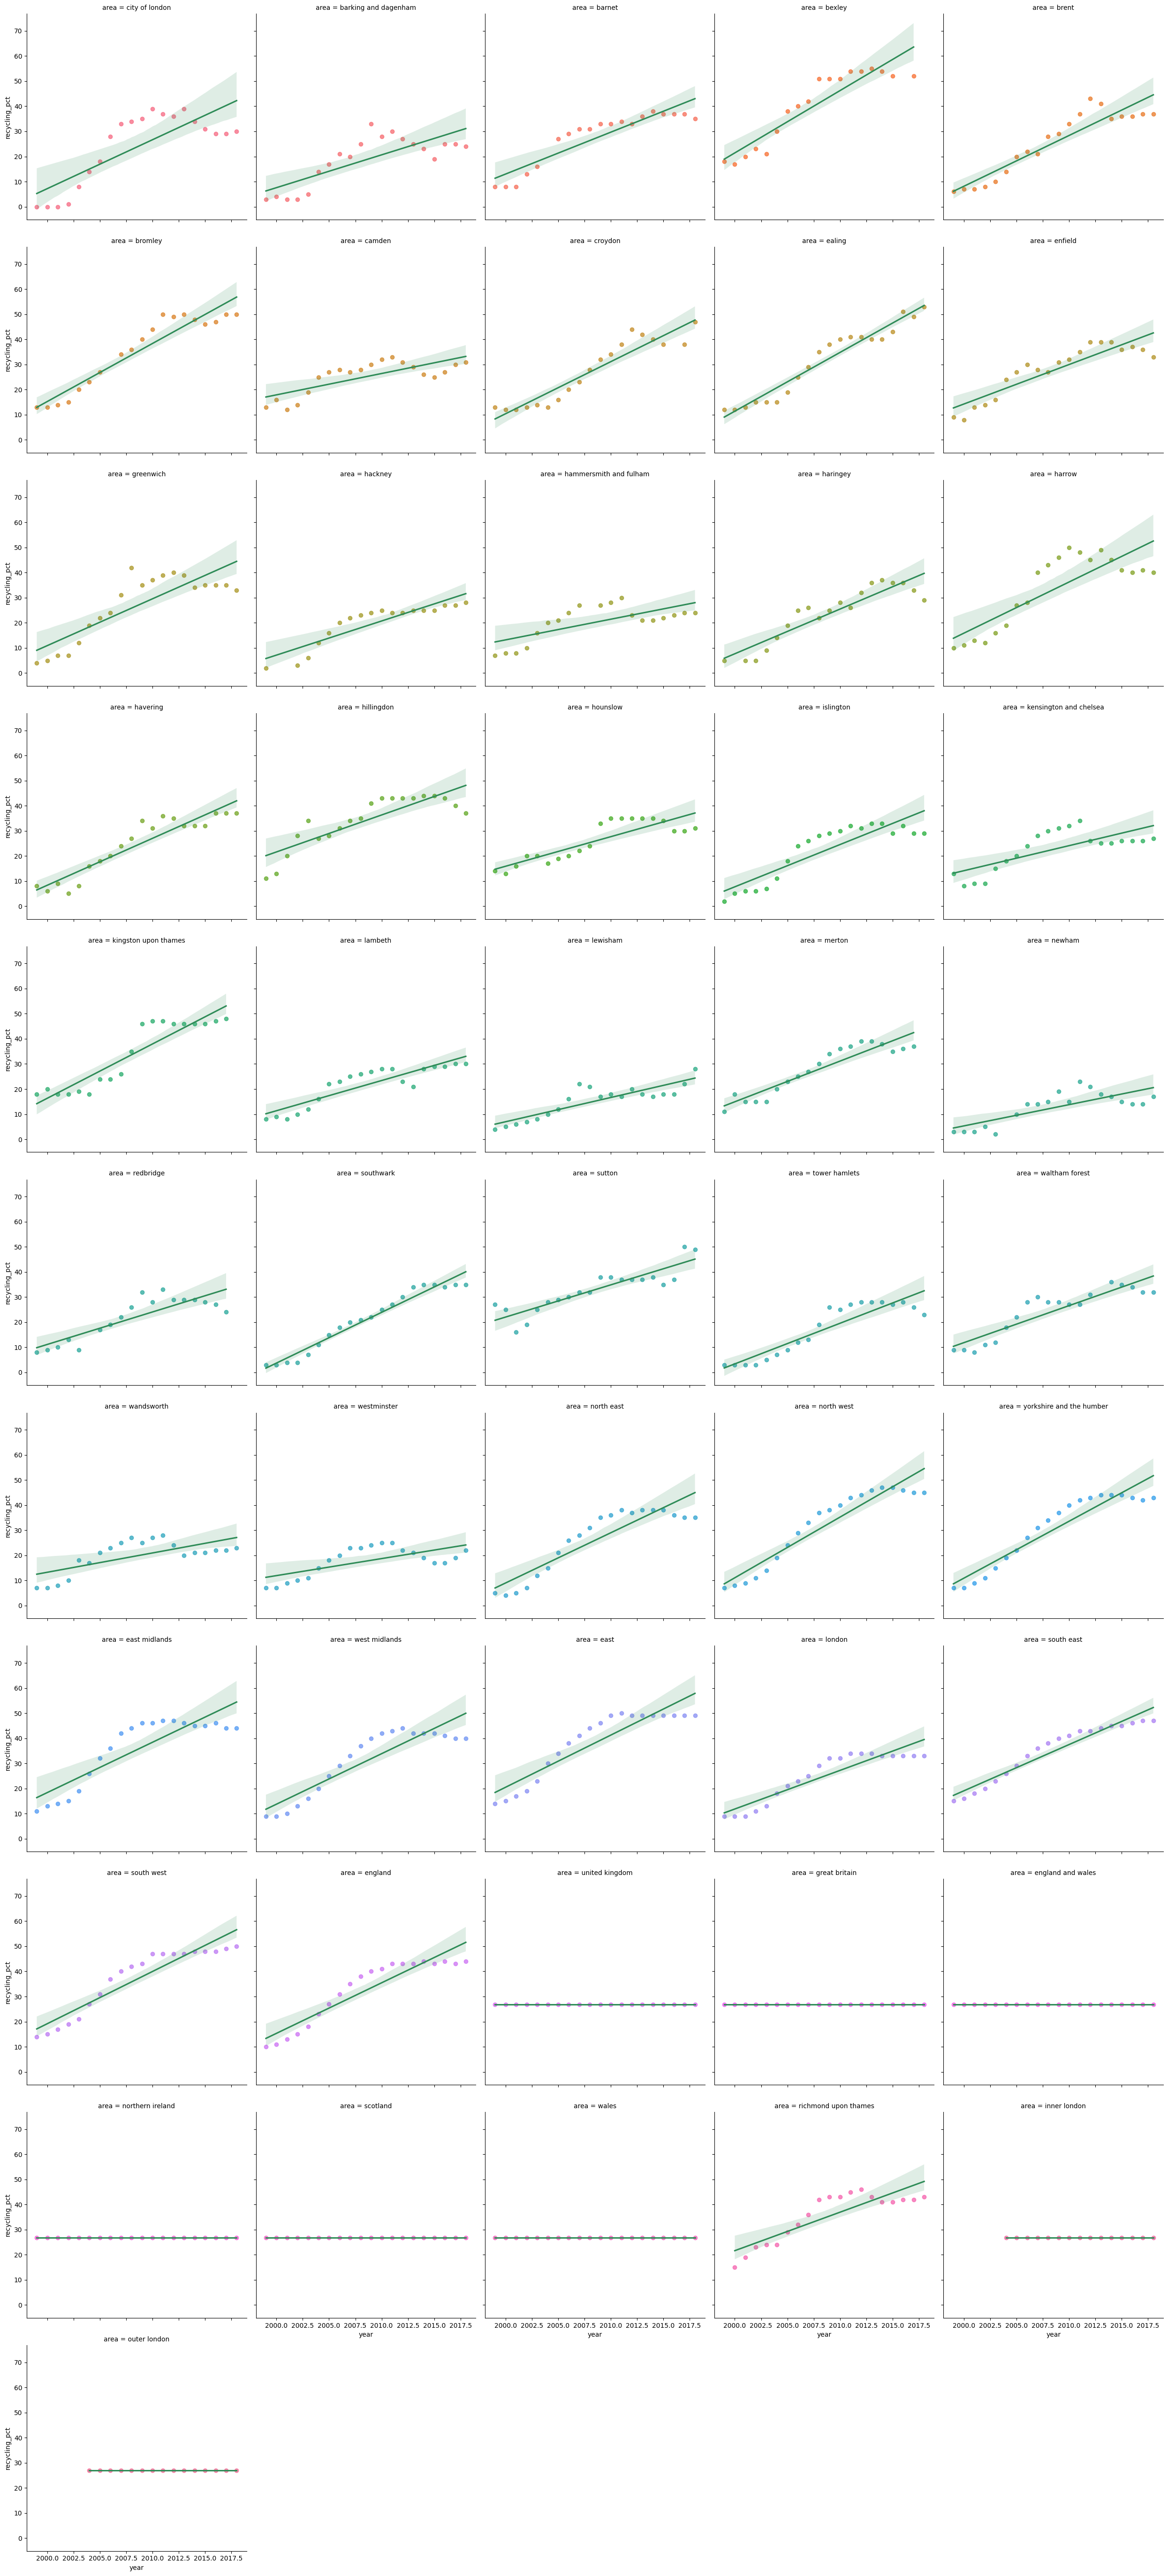

In [169]:
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='recycling_pct',x='year',data=year_df,col="area", hue="area",col_wrap=5,line_kws={'color': 'seagreen'})


Recycling % of Households have definitely Increased for Almost Every Area in our Dataset except
- united kingdom
- great britain
- england and wales
- northern ireland
- scotland
- wales
- inner london
- outer london

All the above areas are Non-Borough Flag Areas where No of Households Recycling have remain constant over the period of time.
This can be because of no improvement in the Recycling Facilities in those Areas.

# Corelation Between Both Datasets Columns

In [170]:
# year_df[(year_df['area']=='inner london') | (year_df['area']=='outer london')]

In [286]:
area_df.shape

(13455, 8)

In [283]:
df = pd.merge(area_df, year_df, how='outer', on=['year','area'])

In [294]:
# df

In [289]:
df1=df[['average_price','houses_sold','year','median_salary','mean_salary','recycling_pct','population_size','area_size','number_of_jobs', 'no_of_houses']].corr()

<Axes: >

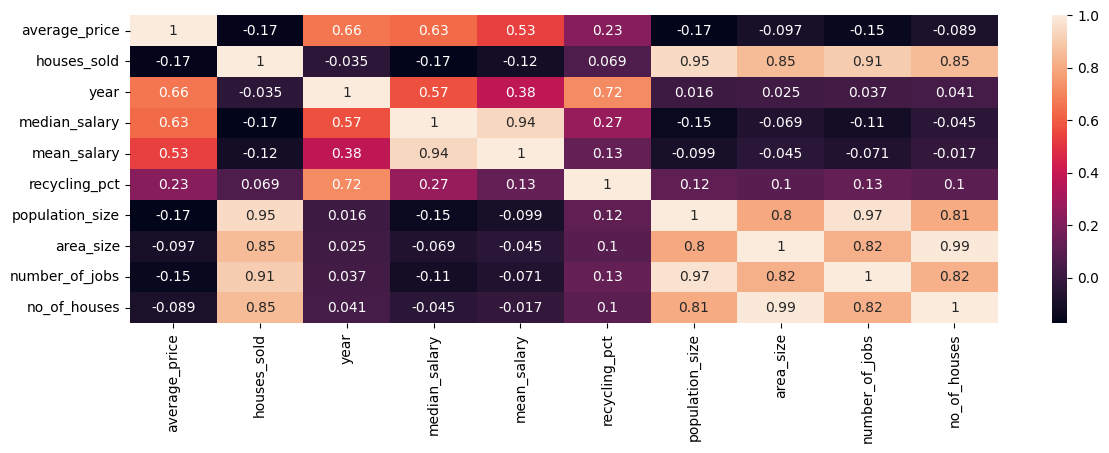

In [293]:
plt.figure(figsize=(14,4))
sns.heatmap(df1, annot=True)

* We can See the Positive Relation of Avg Prices of Houses with Mean, Median Salary and is slightly related to Recycling % of houses.

* Avg Prices of Houses also have -ive relation with Population , Area Size, No of Jobs, No of Houses in the area.

* We can see the Negative Relation of Houses Sold with Mean Salary and Median Salary whereas

* Houses sold have +ive relation with Population, Area size, No of Jobs, No of Houses in the area.

# Summary

### Column Wise Corelation 

* The Average Price of Houses, recycling %, avg salary of people have increased for areas in the dataset over years.

* While population size, no of jobs, jo of houses and area size have near to a small increase over the years.

* The Number of Houses Sold have decreased for all areas in the dataset over years. One reason for this decrease in Houses Sold count is Uneven distribution of Borough, Non-Borough Flag Areas.

* Houses Sold have decreased most in the year 2008.

* Mean, Median Salary have decreased for areas with big area size, population size, more number of Houses and Jobs.  This shows Avg Salaary of People is more in less area and population size areas. No of Houses and No of Jobs are more in bigger area size areas with more population which leads to less salary due to more resources available there.

* Recycling % of Household doesn't have any particular relation with other column values.

* Average Price of Houses and Houses Sold count are negatively corelated. As the Average Prices of Houses is more in areas the number of Houses are sold less in those areas.

*  Avg Prices of Houses have +ive relation with Mean, Median Salary and is slightly related to Recycling % of houses and -ive relation with Population , Area Size, No of Jobs, No of Houses in the area and is same for all these columns.

*  Houses sold have +ive relation with Population, Area size, No of Jobs, No of Houses in the area & Negative Relation with Mean Salary and Median Salary and is same for all these columns.
--------------------------------------------------------------------------------------------------------------------------------------------
### Borough/Non-Borough Wise

**Whole DataSet have a higher distribution for Borough Flag Areas in comparison to Non Borough flag areas.**


* Areas in Borough Flag are having higher Average Prices of Houses. Maybe they areexpensive because of all the Benefits,facilities and Perks.
* Average Price of Houses in Non-Borough Flag Areas are cheaper than Borough Flag Areas.

* Non Borough Flag areas Houses are Sold More because of their less cost. 
* Even if people who becomes financially better move to a Borough Flag area and sold their existing Non Borough Flag Area Houses.
But there are exception not all Non-Borough Flag areas are having less cost and less facilities.

* Avg Salary is more in Borough Flag Areas which shows most Borough Flag areas come under small area sizes with less population and with less number of Jobs.

* Non-Borough Flag areas are having More Population, Area, No of Houses and No of Jobs which leads to less Average Salary of People living there.

----------------------------------------------------------------------------------------------------------------------------------
### Area Wise

* **City of London** having the highest Avg Salary among all other areas.
**Followed by Tower Hamlets,** \
**Westminster,** \
**Inner London,** \
**Islington and London.** All The Above Areas with higher Average Salary are Borough Flag Areas except London and Inner London.

  
* **London and Inner London** are the only exception for it's higher avg salary while coming under Non Borough Flag Areas.

* The Average Price of Houses is highest in **Kesington and chelsea, city of london, westminster, camden** which are Borough Flag Area.
* The areas with Drastic Change in their average prices from 1996-2020 are:
**city of london** \
**camden** \
**kensington and chelsea** \
**westminster** \
**hammersmith and fulham** 
* The areas with Drastic Change in their average prices from 1996-2020. This means have improved most in terms for better living of people and 
opportunities.

* Maximum Houses Sold is in **England** which is Non-Borough Flag Area. England shows a drastic Change in Houses Sold count. It means Houses Sold count have decreased mostly in Area England over years.It shows maybe people from England are getting better lifestyles now. But still max no of houses sold are from England.

* While Max Population Size is in: **United Kingdom** followed by \
**Great Britain** \
**England and Wales** \
**England** .Areas with max Population Size also falls under Non-Borough Flag Category.

* Max Area Size is in: **England** followed by \
**London** \
**Outer London** \
**Inner London** . They are Non-Borougb Flag areas.


* MaxNumber of Houses are in **England** as England has the highest Area Size among all areas.

* Max Number of Jobs are in **United Kingdom** followed by \
**Great Britain** \
**England and Wales.** \
**England**. All of these areas are Non Borough Flag Areas.


-----------------------------------------------------------------------------------------------------------

* The Avg Salary is lowest for **North East** followed by \
**Havering,** \
**Wales,** \
**Northern Ireland** \
**South West** over the years from 1999-2018.

  
* The Average Price of Houses is lowest in **North East** \
**North West** \
**England** . They are Non-Borough Flag Areas.

* Minimum Houses sold is in **City of London** which is a Borough Flag Area  
* Minimum Area & Population Size is in **City of London** which comes under Borough Flag Area.
* So the Minimum Number of Houses are in **City of London** since it has smallest Area and Population Size too.

* Minimum No of Jobs are in **barking and dagenham** followed by \
**waltham forest,** \
**Sutton and Greenwich.** All of them are Borough Flag Areas.

----------------------------------------------------------------------------------------------------------------------------

* Recycling % of Households have definitely Increased for Almost Every Area over years in our Dataset except

- united kingdom
- great britain
- england and wales
- northern ireland
- scotland
- wales
- inner london
- outer london
* All the above areas are Non-Borough Flag Areas. This can be because of no improvement in the Recycling Facilities in those Areas.







